In [22]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os 
import glob
#import cv2
from tqdm import tqdm_notebook
from random import shuffle
import shutil
import pandas as pd

In [23]:
import keras.applications
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import optimizers
from keras.utils import to_categorical

from keras_vggface.vggface import VGGFace
from keras_vggface import utils

In [24]:
import keras
#from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import Callback

model_weights_checkpoint = 'vgg_face_eor_classes.h5'

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
history = LossHistory()

## Callback for early stopping the training
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=4,
                              verbose=0, mode='auto')

checkpoint = keras.callbacks.ModelCheckpoint(model_weights_checkpoint, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [25]:
img_width, img_height = 128, 128
n_classes = 2
debug = False

In [26]:
# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(img_width, img_height, 3))  # this assumes K.image_data_format() == 'channels_last'

In [27]:
#base_model = keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)
#base_model = keras.applications.ResNet50(include_top=False, weights='imagenet')#, input_tensor=input_tensor)
#base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

base_model = VGGFace(include_top=False, input_shape=(img_width, img_height, 3), pooling='avg')

In [28]:
#base_model.summary()

In [29]:
#load and save features from ir and depth 

In [30]:
PATH_IMAGES = "C:\\Users\\rafae\\Desktop\\Coleta\\data"

IR_FOLDER = "ir-subset-eor"
DEPTH_FOLDER ="depth-subset-eor"

TRAIN = 'train'
VAL = 'val'

EOR = 'EOR'
NEOR = 'NEOR'

DASH = "\\"

IR1_PATTERN = '{:s}_{:s}_ir1_{:s}'
IR2_PATTERN = '{:s}_{:s}_ir2_{:s}'
DEP_PATTERN = '{:s}_{:s}_depth_{:s}'
DEPC_PATTERN = '{:s}_{:s}_color_depth_color_{:s}'
PNG = '.png'

EOR_VALUE = 1
NEOR_VALUE = 0

def load_img(img_path):
    global base_model
    img = image.load_img(img_path, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1)
    return base_model.predict(x)

In [80]:
# save features
def load_features(folder, eor, eor_value):
    PATTERN_IR = PATH_IMAGES + DASH + IR_FOLDER + DASH + folder + DASH + eor + DASH 
    PATTERN_DEP = PATH_IMAGES + DASH + DEPTH_FOLDER + DASH + folder + DASH + eor + DASH

    #features = pd.DataFrame(columns=["eor", "id", "point", "image", "ir1", "ir2", "dep_bw", "dep_rgb"])
    features = []
    if debug: print(PATTERN_IR)

    files_list = glob.glob(PATTERN_IR + "*_*_ir1_*.png")
    if debug: print(len(files_list))

    for f in files_list:
        f1 = f.split('\\')[-1]
        f = f1.split('_')
        f[-1] = f[-1].split('.')[0]
        if debug: print(f)

        if not os.path.exists(PATTERN_IR + IR1_PATTERN.format(f[0], f[1], f[3]) + PNG) \
            or not os.path.exists(PATTERN_DEP + DEP_PATTERN.format(f[0], f[1], f[3]) + PNG) \
            or not os.path.exists(PATTERN_DEP + DEPC_PATTERN.format(f[0], f[1], f[3]) + PNG):
                print("error")
                continue
                    #or not os.path.exists(PATTERN_IR + IR2_PATTERN.format(f[0], f[1], f[3]) + PNG) 
                    
        features_ir1 = load_img(PATTERN_IR + IR1_PATTERN.format(f[0], f[1], f[3]) + PNG)
        #features_ir2 = load_img(PATTERN_IR + IR2_PATTERN.format(f[0], f[1], f[3]) + PNG)
        features_dep = load_img(PATTERN_DEP + DEP_PATTERN.format(f[0], f[1], f[3]) + PNG)
        features_depc = load_img(PATTERN_DEP + DEPC_PATTERN.format(f[0], f[1], f[3]) + PNG)

        if debug: print(PATTERN_IR + IR1_PATTERN.format(f[0], f[1], f[3]) + PNG, features_ir1.shape)
            
        data = [eor_value, f[0], f[1], f[3]]
        data.extend(features_ir1[0])
        #data.extend(features_ir2[0])
        data.extend(features_dep[0])
        data.extend(features_depc[0])
        
        features.append(data)
        
    df_features = pd.DataFrame(features)
    df_features.rename(columns={0:"eor", 1:"id", 2:"point", 3:"image", 4:"ir1", 516:"dep_bw", 1028:"dep_rgb", 1540:"dep_rgb"}, inplace =True)#516:"ir2", 1028:"dep_bw", 1540:"dep_rgb"}, inplace =True)
    return df_features

In [81]:
features_train_eor = load_features(TRAIN, EOR, EOR_VALUE)
features_train_neor = load_features(TRAIN, NEOR, NEOR_VALUE)

features_val_eor = load_features(VAL, EOR, EOR_VALUE)
features_val_neor = load_features(VAL, NEOR, NEOR_VALUE)

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

In [82]:
features_train = pd.concat([features_train_eor, features_train_neor])
features_val = pd.concat([features_val_eor, features_val_neor])

features_train.head()

,eor,id,point,image,ir1,5,6,7,8,9,...,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539
0,1,01,13,1,0.988739,2.039143,0.248262,0.000000,0.0,9.688241,...,0.0,0.000000,0.979391,0.000000,0.191572,9.335439,2.135622,0.0,0.0,0.151517
1,1,01,13,101,0.894081,2.578938,0.191407,0.049469,0.0,8.748578,...,0.0,0.088764,0.721870,0.000000,3.122820,11.810625,1.903937,0.0,0.0,0.008059
2,1,01,13,11,0.989725,2.077088,0.221179,0.001518,0.0,9.796830,...,0.0,0.749536,1.313927,0.533755,0.000000,12.853697,1.508735,0.0,0.0,0.382692
3,1,01,13,111,0.886810,2.305444,0.194974,0.005231,0.0,8.197814,...,0.0,0.000000,1.246013,0.000000,0.000000,9.329632,3.481939,0.0,0.0,0.472956
4,1,01,13,121,0.752678,2.417488,0.181901,0.000000,0.0,10.128336,...,0.0,0.000000,1.290691,0.000000,0.687830,8.111677,3.262325,0.0,0.0,0.267931


In [83]:
features_train.to_csv('features_train_new.csv')
#features_train.to_hdf('features_train.h5','df')

features_val.to_csv('features_val_new.csv')
#features_val.to_hdf('features_val.h5','df')

In [84]:
print(features_train.shape, features_val.shape)
print(features_train_eor.shape, features_train_neor.shape, features_val_eor.shape, features_val_neor.shape)

(10620, 1540) (4304, 1540)
(3526, 1540) (7094, 1540) (870, 1540) (3434, 1540)


In [ ]:
#features_train = pd.read_csv('features_train.csv')
#features_val = pd.read_csv('features_val.csv')

In [17]:
features_train['eor_logical'] = features_train['eor'].astype('category')
features_val['eor_logical'] = features_val['eor'].astype('category')

features_train['point_logical'] = features_train['point'].astype('category')
features_val['point_logical'] = features_val['point'].astype('category')

features_train.head()

,eor,id,point,image,ir1,ir2,dep_bw,dep_rgb,eor_logical,point_logical
0,1,01,13,1,"[0.903718, 8.104907, 0.8161479, 2.6585116, 1.1...","[0.970111, 7.2870727, 1.2591738, 2.7109182, 0....","[6.937982, 0.0, 0.0, 0.0, 0.13651185, 0.0, 0.0...","[6.45471, 0.50666356, 0.15838633, 0.19188035, ...",1,13
1,1,01,13,101,"[1.0609776, 8.762242, 0.5498436, 2.5320923, 1....","[1.2862395, 6.350608, 1.5189748, 2.3941472, 0....","[6.937982, 0.0, 0.0, 0.0, 0.13651185, 0.0, 0.0...","[6.020858, 0.4160142, 0.16224039, 0.18995202, ...",1,13
2,1,01,13,11,"[0.8795574, 8.243204, 0.48805818, 2.7372882, 1...","[1.4469314, 6.745829, 1.4862092, 2.4101744, 0....","[6.937982, 0.0, 0.0, 0.0, 0.13651185, 0.0, 0.0...","[5.539432, 0.24041545, 0.18962061, 0.122051395...",1,13
3,1,01,13,111,"[1.0221361, 7.2213664, 0.5640991, 2.133757, 1....","[1.5490291, 5.2143703, 1.2415984, 2.0823464, 0...","[6.937982, 0.0, 0.0, 0.0, 0.13651185, 0.0, 0.0...","[7.2107315, 0.27544272, 0.32716194, 0.05518081...",1,13
4,1,01,13,121,"[0.9814787, 9.211072, 0.45832458, 1.930164, 1....","[0.8428535, 7.245288, 1.1389878, 2.3666718, 0....","[6.937982, 0.0, 0.0, 0.0, 0.13651185, 0.0, 0.0...","[6.993344, 0.7140468, 0.38563296, 0.09154399, ...",1,13


In [19]:
features_train['eor_logical'].value_counts()

0    13551
1     3498
Name: eor_logical, dtype: int64

In [69]:
features_train['point_logical'].describe()

count     17049
unique       19
top           1
freq        960
Name: point_logical, dtype: object

In [31]:
ytrain = features_train[features_train['eor_logical'] == 1]['eor_logical']
ytrain = pd.concat([ytrain, ytrain])

In [75]:
xtrain1 = features_train.loc[features_train['eor_logical'] == 1,['ir1','dep_rgb']]
xtrain1 = pd.concat([pd.DataFrame(xtrain1['ir1'].values.tolist()), pd.DataFrame(xtrain1['dep_rgb'].values.tolist())], axis=1)

xtrain2 = features_train.loc[features_train['eor_logical'] == 1,['ir2','dep_rgb']]
xtrain2 = pd.concat([pd.DataFrame(xtrain2['ir2'].values.tolist()), pd.DataFrame(xtrain2['dep_rgb'].values.tolist())], axis=1)

xtrain = pd.concat([xtrain1, xtrain2])

In [71]:
xtrain.describe()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
count,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,...,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,1.463236,3.702339,3.148472,1.542624,2.179003,3.280169,5.221469,3.404614,4.284730,4.858452,...,0.709944,2.106174,2.661275,1.282387,2.886233,3.430074,3.260532,2.408412,3.142690,1.524302
std,1.568545,3.321891,2.443613,1.389345,2.094974,2.553156,2.265492,4.119830,3.336160,3.636847,...,1.146564,2.456229,1.641525,1.853825,2.584678,2.299758,1.707460,1.702498,2.591831,2.376871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.322068,0.000000,0.000000,0.018966,...,0.000000,0.000000,0.006542,0.000000,0.000000,0.257900,0.139825,0.000000,0.000000,0.000000
25%,0.323917,0.930994,1.181744,0.483826,0.561336,1.366757,3.712445,0.135381,1.401365,2.621187,...,0.000000,0.166621,1.454347,0.063245,1.268438,1.698757,1.933449,1.180520,1.048594,0.003202
50%,0.900505,2.736770,2.465093,1.173897,1.606539,2.823318,5.027107,2.008665,3.805286,4.047122,...,0.150567,1.154992,2.270728,0.470199,1.994598,3.038328,2.961525,2.010000,2.592768,0.503734
75%,2.145874,5.860829,4.462185,2.282653,3.156037,4.718757,6.422071,5.232454,6.509725,6.208471,...,0.913522,3.394672,3.634165,1.805583,3.422012,4.581658,4.385580,3.280345,4.552444,1.924379
max,8.859762,17.804052,13.521909,8.858095,10.896713,17.016041,16.099644,22.473389,16.187057,26.230875,...,7.106496,14.108934,11.645372,13.197554,13.440701,15.453043,9.941011,9.103439,13.041378,15.413857


In [89]:
# check train and val data
qtty_neor = {"1": 300,"2": 400,"3" :400, "4": 400,"5":400,"6": 400,"7": 400, \
             "19": 400,'10': 800, "11": 800,"15": 700,"18": 700,"9":700,"8": 500}

In [90]:
xtrain_0 = pd.DataFrame()
for k,v in qtty_neor.items():
    #print(k,v)
    xtrain3 = features_train.loc[(features_train['eor_logical'] == 0) & (features_train['point'] == k),['ir2','dep_rgb']]
    xtrain3 = xtrain3.sample(n=v)
    xtrain3 = pd.concat([pd.DataFrame(xtrain3['ir2'].values.tolist()), pd.DataFrame(xtrain3['dep_rgb'].values.tolist())], axis=1)
    xtrain_0 = pd.concat([xtrain_0, xtrain3])

In [92]:
xtrain = pd.concat([xtrain, xtrain_0])

In [116]:
ytrain = pd.concat([ytrain, pd.Series([0]*xtrain_0.shape[0])])

In [117]:
print(xtrain.shape, ytrain.shape)

(14296, 1024) (14296,)


In [ ]:
#features_val['point_logical'].value_counts()

In [119]:
yval = features_val[features_val['eor_logical'] == 1]['eor_logical']

In [123]:
xtrain2 = features_val.loc[features_val['eor_logical'] == 1,['ir2','dep_rgb']]
xval = pd.concat([pd.DataFrame(xtrain2['ir2'].values.tolist()), pd.DataFrame(xtrain2['dep_rgb'].values.tolist())], axis=1)

In [124]:
xval.shape

(870, 1024)

In [ ]:
# check train and val data
qtty_neor_val = {"1": 70,"2": 70,"3" :70, "4": 70,"5":70,"6": 70,"7": 70, \
             "19": 100,'10': 150, "11": 150,"15": 150,"18": 150,"9":150,"8": 80}

In [130]:
xval_0 = pd.DataFrame()
for k,v in qtty_neor_val.items():
    xtrain3 = features_val.loc[(features_val['eor_logical'] == 0) & (features_val['point'] == k),['ir2','dep_rgb']]
    xtrain3 = xtrain3.sample(n=v)
    xtrain3 = pd.concat([pd.DataFrame(xtrain3['ir2'].values.tolist()), pd.DataFrame(xtrain3['dep_rgb'].values.tolist())], axis=1)
    xval_0 = pd.concat([xval_0, xtrain3])

In [132]:
xval = pd.concat([xval, xval_0])

In [133]:
yval = pd.concat([yval, pd.Series([0]*xval_0.shape[0])])

In [134]:
print(xval.shape, yval.shape)

(2290, 1024) (2290,)


In [148]:
train_labels = to_categorical(ytrain, num_classes=2)
validation_labels = to_categorical(yval, num_classes=2)

In [6]:
nb_train_samples = 14296
nb_validation_samples = 2290
epochs = 1000
batch_size = 512
samples_per_epoch= 5000

In [7]:
# let's add a fully-connected layer
model = Sequential()
#model.add(Flatten(input_shape=xtrain.shape[1:]))
model.add(Dense(256, input_shape=xtrain.shape[1:], activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

NameError: name 'xtrain' is not defined

In [229]:
# compile the model (should be done *after* setting layers to non-trainable)
#model.compile(optimizer='sgd', loss='categorical_crossentropy')
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy','mae'])

In [230]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 514       
Total params: 328,706
Trainable params: 328,706
Non-trainable params: 0
_________________________________________________________________


In [231]:
model.fit(xtrain, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(xval, validation_labels))

Train on 14296 samples, validate on 2290 samples
Epoch 1/1000
14296/14296 [==============================] - ETA: 29s - loss: 3.8368 - acc: 0.5371 - mean_absolute_error: 0.47 - ETA: 9s - loss: 4.0048 - acc: 0.5189 - mean_absolute_error: 0.4819 - ETA: 5s - loss: 4.1379 - acc: 0.5129 - mean_absolute_error: 0.486 - ETA: 4s - loss: 4.1630 - acc: 0.5092 - mean_absolute_error: 0.490 - ETA: 3s - loss: 4.1373 - acc: 0.5085 - mean_absolute_error: 0.491 - ETA: 2s - loss: 4.1316 - acc: 0.5107 - mean_absolute_error: 0.489 - ETA: 2s - loss: 4.0821 - acc: 0.5125 - mean_absolute_error: 0.487 - ETA: 1s - loss: 4.0414 - acc: 0.5130 - mean_absolute_error: 0.486 - ETA: 1s - loss: 4.0209 - acc: 0.5123 - mean_absolute_error: 0.487 - ETA: 1s - loss: 3.9585 - acc: 0.5149 - mean_absolute_error: 0.484 - ETA: 0s - loss: 3.9366 - acc: 0.5154 - mean_absolute_error: 0.484 - ETA: 0s - loss: 3.8866 - acc: 0.5180 - mean_absolute_error: 0.481 - ETA: 0s - loss: 3.8849 - acc: 0.5149 - mean_absolute_error: 0.484 - ETA: 0

14296/14296 [==============================] - ETA: 1s - loss: 0.6974 - acc: 0.6035 - mean_absolute_error: 0.445 - ETA: 1s - loss: 0.7007 - acc: 0.5905 - mean_absolute_error: 0.447 - ETA: 0s - loss: 0.7188 - acc: 0.5813 - mean_absolute_error: 0.453 - ETA: 0s - loss: 0.7152 - acc: 0.5826 - mean_absolute_error: 0.453 - ETA: 0s - loss: 0.7169 - acc: 0.5859 - mean_absolute_error: 0.453 - ETA: 0s - loss: 0.7143 - acc: 0.5861 - mean_absolute_error: 0.452 - ETA: 0s - loss: 0.7161 - acc: 0.5827 - mean_absolute_error: 0.453 - ETA: 0s - loss: 0.7163 - acc: 0.5811 - mean_absolute_error: 0.453 - ETA: 0s - loss: 0.7159 - acc: 0.5832 - mean_absolute_error: 0.453 - ETA: 0s - loss: 0.7175 - acc: 0.5828 - mean_absolute_error: 0.453 - ETA: 0s - loss: 0.7175 - acc: 0.5824 - mean_absolute_error: 0.453 - ETA: 0s - loss: 0.7161 - acc: 0.5830 - mean_absolute_error: 0.453 - ETA: 0s - loss: 0.7165 - acc: 0.5825 - mean_absolute_error: 0.453 - ETA: 0s - loss: 0.7184 - acc: 0.5795 - mean_absolute_error: 0.454 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.6255 - acc: 0.6348 - mean_absolute_error: 0.432 - ETA: 1s - loss: 0.6333 - acc: 0.6198 - mean_absolute_error: 0.437 - ETA: 0s - loss: 0.6454 - acc: 0.6090 - mean_absolute_error: 0.442 - ETA: 0s - loss: 0.6394 - acc: 0.6116 - mean_absolute_error: 0.438 - ETA: 0s - loss: 0.6383 - acc: 0.6120 - mean_absolute_error: 0.437 - ETA: 0s - loss: 0.6407 - acc: 0.6099 - mean_absolute_error: 0.438 - ETA: 0s - loss: 0.6429 - acc: 0.6095 - mean_absolute_error: 0.439 - ETA: 0s - loss: 0.6426 - acc: 0.6090 - mean_absolute_error: 0.439 - ETA: 0s - loss: 0.6415 - acc: 0.6111 - mean_absolute_error: 0.439 - ETA: 0s - loss: 0.6440 - acc: 0.6092 - mean_absolute_error: 0.440 - ETA: 0s - loss: 0.6467 - acc: 0.6068 - mean_absolute_error: 0.441 - ETA: 0s - loss: 0.6455 - acc: 0.6089 - mean_absolute_error: 0.440 - ETA: 0s - loss: 0.6446 - acc: 0.6094 - mean_absolute_error: 0.440 - ETA: 0s - loss: 0.6452 - acc: 0.6102 - mean_absolute_error: 0.440 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.6161 - acc: 0.6055 - mean_absolute_error: 0.426 - ETA: 0s - loss: 0.6281 - acc: 0.6204 - mean_absolute_error: 0.433 - ETA: 0s - loss: 0.6234 - acc: 0.6367 - mean_absolute_error: 0.429 - ETA: 0s - loss: 0.6284 - acc: 0.6325 - mean_absolute_error: 0.432 - ETA: 0s - loss: 0.6303 - acc: 0.6280 - mean_absolute_error: 0.433 - ETA: 0s - loss: 0.6343 - acc: 0.6268 - mean_absolute_error: 0.434 - ETA: 0s - loss: 0.6320 - acc: 0.6277 - mean_absolute_error: 0.433 - ETA: 0s - loss: 0.6279 - acc: 0.6320 - mean_absolute_error: 0.432 - ETA: 0s - loss: 0.6259 - acc: 0.6333 - mean_absolute_error: 0.431 - ETA: 0s - loss: 0.6261 - acc: 0.6332 - mean_absolute_error: 0.431 - ETA: 0s - loss: 0.6239 - acc: 0.6345 - mean_absolute_error: 0.430 - ETA: 0s - loss: 0.6243 - acc: 0.6342 - mean_absolute_error: 0.430 - ETA: 0s - loss: 0.6267 - acc: 0.6341 - mean_absolute_error: 0.431 - ETA: 0s - loss: 0.6252 - acc: 0.6363 - mean_absolute_error: 0.431 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.6051 - acc: 0.6426 - mean_absolute_error: 0.417 - ETA: 0s - loss: 0.5959 - acc: 0.6680 - mean_absolute_error: 0.413 - ETA: 0s - loss: 0.6017 - acc: 0.6652 - mean_absolute_error: 0.415 - ETA: 0s - loss: 0.6017 - acc: 0.6673 - mean_absolute_error: 0.415 - ETA: 0s - loss: 0.6013 - acc: 0.6660 - mean_absolute_error: 0.416 - ETA: 0s - loss: 0.5970 - acc: 0.6678 - mean_absolute_error: 0.414 - ETA: 0s - loss: 0.5952 - acc: 0.6699 - mean_absolute_error: 0.414 - ETA: 0s - loss: 0.5937 - acc: 0.6685 - mean_absolute_error: 0.413 - ETA: 0s - loss: 0.5942 - acc: 0.6686 - mean_absolute_error: 0.413 - ETA: 0s - loss: 0.5949 - acc: 0.6678 - mean_absolute_error: 0.413 - ETA: 0s - loss: 0.5965 - acc: 0.6648 - mean_absolute_error: 0.414 - ETA: 0s - loss: 0.5971 - acc: 0.6654 - mean_absolute_error: 0.414 - ETA: 0s - loss: 0.5973 - acc: 0.6648 - mean_absolute_error: 0.414 - ETA: 0s - loss: 0.5972 - acc: 0.6645 - mean_absolute_error: 0.414 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.5767 - acc: 0.6680 - mean_absolute_error: 0.402 - ETA: 1s - loss: 0.5782 - acc: 0.6764 - mean_absolute_error: 0.401 - ETA: 0s - loss: 0.5727 - acc: 0.6813 - mean_absolute_error: 0.398 - ETA: 0s - loss: 0.5829 - acc: 0.6780 - mean_absolute_error: 0.401 - ETA: 0s - loss: 0.5826 - acc: 0.6777 - mean_absolute_error: 0.402 - ETA: 0s - loss: 0.5819 - acc: 0.6768 - mean_absolute_error: 0.401 - ETA: 0s - loss: 0.5827 - acc: 0.6783 - mean_absolute_error: 0.401 - ETA: 0s - loss: 0.5801 - acc: 0.6814 - mean_absolute_error: 0.399 - ETA: 0s - loss: 0.5788 - acc: 0.6818 - mean_absolute_error: 0.399 - ETA: 0s - loss: 0.5775 - acc: 0.6827 - mean_absolute_error: 0.399 - ETA: 0s - loss: 0.5775 - acc: 0.6826 - mean_absolute_error: 0.399 - ETA: 0s - loss: 0.5777 - acc: 0.6813 - mean_absolute_error: 0.399 - ETA: 0s - loss: 0.5766 - acc: 0.6823 - mean_absolute_error: 0.398 - ETA: 0s - loss: 0.5763 - acc: 0.6812 - mean_absolute_error: 0.398 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.5681 - acc: 0.6816 - mean_absolute_error: 0.387 - ETA: 0s - loss: 0.5587 - acc: 0.7051 - mean_absolute_error: 0.385 - ETA: 0s - loss: 0.5583 - acc: 0.7102 - mean_absolute_error: 0.384 - ETA: 0s - loss: 0.5510 - acc: 0.7109 - mean_absolute_error: 0.381 - ETA: 0s - loss: 0.5517 - acc: 0.7129 - mean_absolute_error: 0.381 - ETA: 0s - loss: 0.5513 - acc: 0.7139 - mean_absolute_error: 0.380 - ETA: 0s - loss: 0.5542 - acc: 0.7077 - mean_absolute_error: 0.381 - ETA: 0s - loss: 0.5558 - acc: 0.7058 - mean_absolute_error: 0.382 - ETA: 0s - loss: 0.5585 - acc: 0.7003 - mean_absolute_error: 0.384 - ETA: 0s - loss: 0.5575 - acc: 0.7023 - mean_absolute_error: 0.384 - ETA: 0s - loss: 0.5547 - acc: 0.7041 - mean_absolute_error: 0.383 - ETA: 0s - loss: 0.5530 - acc: 0.7070 - mean_absolute_error: 0.382 - ETA: 0s - loss: 0.5532 - acc: 0.7055 - mean_absolute_error: 0.382 - ETA: 0s - loss: 0.5538 - acc: 0.7042 - mean_absolute_error: 0.383 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.5269 - acc: 0.7441 - mean_absolute_error: 0.368 - ETA: 0s - loss: 0.5361 - acc: 0.7298 - mean_absolute_error: 0.369 - ETA: 0s - loss: 0.5357 - acc: 0.7207 - mean_absolute_error: 0.370 - ETA: 0s - loss: 0.5348 - acc: 0.7218 - mean_absolute_error: 0.370 - ETA: 0s - loss: 0.5303 - acc: 0.7249 - mean_absolute_error: 0.368 - ETA: 0s - loss: 0.5326 - acc: 0.7217 - mean_absolute_error: 0.369 - ETA: 0s - loss: 0.5323 - acc: 0.7218 - mean_absolute_error: 0.369 - ETA: 0s - loss: 0.5326 - acc: 0.7231 - mean_absolute_error: 0.369 - ETA: 0s - loss: 0.5320 - acc: 0.7257 - mean_absolute_error: 0.369 - ETA: 0s - loss: 0.5320 - acc: 0.7252 - mean_absolute_error: 0.369 - ETA: 0s - loss: 0.5309 - acc: 0.7249 - mean_absolute_error: 0.368 - ETA: 0s - loss: 0.5291 - acc: 0.7269 - mean_absolute_error: 0.368 - ETA: 0s - loss: 0.5296 - acc: 0.7288 - mean_absolute_error: 0.367 - ETA: 0s - loss: 0.5308 - acc: 0.7281 - mean_absolute_error: 0.368 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.5468 - acc: 0.7246 - mean_absolute_error: 0.374 - ETA: 1s - loss: 0.5213 - acc: 0.7357 - mean_absolute_error: 0.361 - ETA: 0s - loss: 0.5136 - acc: 0.7438 - mean_absolute_error: 0.355 - ETA: 0s - loss: 0.5133 - acc: 0.7439 - mean_absolute_error: 0.354 - ETA: 0s - loss: 0.5168 - acc: 0.7422 - mean_absolute_error: 0.356 - ETA: 0s - loss: 0.5160 - acc: 0.7392 - mean_absolute_error: 0.355 - ETA: 0s - loss: 0.5147 - acc: 0.7366 - mean_absolute_error: 0.355 - ETA: 0s - loss: 0.5160 - acc: 0.7354 - mean_absolute_error: 0.355 - ETA: 0s - loss: 0.5146 - acc: 0.7370 - mean_absolute_error: 0.354 - ETA: 0s - loss: 0.5151 - acc: 0.7377 - mean_absolute_error: 0.355 - ETA: 0s - loss: 0.5152 - acc: 0.7375 - mean_absolute_error: 0.355 - ETA: 0s - loss: 0.5152 - acc: 0.7379 - mean_absolute_error: 0.355 - ETA: 0s - loss: 0.5155 - acc: 0.7367 - mean_absolute_error: 0.355 - ETA: 0s - loss: 0.5134 - acc: 0.7379 - mean_absolute_error: 0.354 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.4598 - acc: 0.7832 - mean_absolute_error: 0.325 - ETA: 0s - loss: 0.4738 - acc: 0.7747 - mean_absolute_error: 0.333 - ETA: 0s - loss: 0.4846 - acc: 0.7621 - mean_absolute_error: 0.337 - ETA: 0s - loss: 0.4899 - acc: 0.7589 - mean_absolute_error: 0.339 - ETA: 0s - loss: 0.4946 - acc: 0.7504 - mean_absolute_error: 0.342 - ETA: 0s - loss: 0.4977 - acc: 0.7480 - mean_absolute_error: 0.343 - ETA: 0s - loss: 0.4931 - acc: 0.7491 - mean_absolute_error: 0.341 - ETA: 0s - loss: 0.4892 - acc: 0.7534 - mean_absolute_error: 0.339 - ETA: 0s - loss: 0.4900 - acc: 0.7538 - mean_absolute_error: 0.340 - ETA: 0s - loss: 0.4897 - acc: 0.7538 - mean_absolute_error: 0.340 - ETA: 0s - loss: 0.4888 - acc: 0.7547 - mean_absolute_error: 0.339 - ETA: 0s - loss: 0.4884 - acc: 0.7538 - mean_absolute_error: 0.339 - ETA: 0s - loss: 0.4910 - acc: 0.7545 - mean_absolute_error: 0.340 - ETA: 0s - loss: 0.4923 - acc: 0.7541 - mean_absolute_error: 0.341 - 1

14296/14296 [==============================] - ETA: 0s - loss: 0.4545 - acc: 0.7754 - mean_absolute_error: 0.315 - ETA: 1s - loss: 0.4747 - acc: 0.7624 - mean_absolute_error: 0.327 - ETA: 0s - loss: 0.4768 - acc: 0.7594 - mean_absolute_error: 0.329 - ETA: 0s - loss: 0.4761 - acc: 0.7612 - mean_absolute_error: 0.329 - ETA: 0s - loss: 0.4681 - acc: 0.7700 - mean_absolute_error: 0.326 - ETA: 0s - loss: 0.4669 - acc: 0.7743 - mean_absolute_error: 0.326 - ETA: 0s - loss: 0.4683 - acc: 0.7725 - mean_absolute_error: 0.327 - ETA: 0s - loss: 0.4698 - acc: 0.7708 - mean_absolute_error: 0.327 - ETA: 0s - loss: 0.4694 - acc: 0.7721 - mean_absolute_error: 0.327 - ETA: 0s - loss: 0.4701 - acc: 0.7711 - mean_absolute_error: 0.327 - ETA: 0s - loss: 0.4697 - acc: 0.7717 - mean_absolute_error: 0.327 - ETA: 0s - loss: 0.4699 - acc: 0.7721 - mean_absolute_error: 0.328 - ETA: 0s - loss: 0.4701 - acc: 0.7718 - mean_absolute_error: 0.328 - ETA: 0s - loss: 0.4705 - acc: 0.7715 - mean_absolute_error: 0.328 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.4546 - acc: 0.7715 - mean_absolute_error: 0.318 - ETA: 0s - loss: 0.4527 - acc: 0.7741 - mean_absolute_error: 0.317 - ETA: 0s - loss: 0.4535 - acc: 0.7746 - mean_absolute_error: 0.315 - ETA: 0s - loss: 0.4554 - acc: 0.7765 - mean_absolute_error: 0.316 - ETA: 0s - loss: 0.4515 - acc: 0.7791 - mean_absolute_error: 0.314 - ETA: 0s - loss: 0.4595 - acc: 0.7754 - mean_absolute_error: 0.317 - ETA: 0s - loss: 0.4572 - acc: 0.7761 - mean_absolute_error: 0.316 - ETA: 0s - loss: 0.4565 - acc: 0.7750 - mean_absolute_error: 0.316 - ETA: 0s - loss: 0.4558 - acc: 0.7755 - mean_absolute_error: 0.316 - ETA: 0s - loss: 0.4592 - acc: 0.7752 - mean_absolute_error: 0.317 - ETA: 0s - loss: 0.4584 - acc: 0.7752 - mean_absolute_error: 0.316 - ETA: 0s - loss: 0.4574 - acc: 0.7768 - mean_absolute_error: 0.316 - ETA: 0s - loss: 0.4567 - acc: 0.7791 - mean_absolute_error: 0.316 - ETA: 0s - loss: 0.4569 - acc: 0.7791 - mean_absolute_error: 0.316 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.4721 - acc: 0.7812 - mean_absolute_error: 0.314 - ETA: 1s - loss: 0.4498 - acc: 0.7858 - mean_absolute_error: 0.309 - ETA: 0s - loss: 0.4404 - acc: 0.7895 - mean_absolute_error: 0.305 - ETA: 0s - loss: 0.4424 - acc: 0.7888 - mean_absolute_error: 0.306 - ETA: 0s - loss: 0.4408 - acc: 0.7906 - mean_absolute_error: 0.305 - ETA: 0s - loss: 0.4407 - acc: 0.7875 - mean_absolute_error: 0.305 - ETA: 0s - loss: 0.4425 - acc: 0.7877 - mean_absolute_error: 0.306 - ETA: 0s - loss: 0.4440 - acc: 0.7887 - mean_absolute_error: 0.307 - ETA: 0s - loss: 0.4437 - acc: 0.7875 - mean_absolute_error: 0.306 - ETA: 0s - loss: 0.4431 - acc: 0.7874 - mean_absolute_error: 0.305 - ETA: 0s - loss: 0.4415 - acc: 0.7892 - mean_absolute_error: 0.305 - ETA: 0s - loss: 0.4408 - acc: 0.7891 - mean_absolute_error: 0.305 - ETA: 0s - loss: 0.4391 - acc: 0.7896 - mean_absolute_error: 0.304 - ETA: 0s - loss: 0.4384 - acc: 0.7909 - mean_absolute_error: 0.304 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.4064 - acc: 0.7930 - mean_absolute_error: 0.286 - ETA: 0s - loss: 0.4269 - acc: 0.8008 - mean_absolute_error: 0.294 - ETA: 0s - loss: 0.4218 - acc: 0.8032 - mean_absolute_error: 0.291 - ETA: 0s - loss: 0.4195 - acc: 0.8011 - mean_absolute_error: 0.291 - ETA: 0s - loss: 0.4256 - acc: 0.7974 - mean_absolute_error: 0.294 - ETA: 0s - loss: 0.4231 - acc: 0.8012 - mean_absolute_error: 0.293 - ETA: 0s - loss: 0.4251 - acc: 0.8010 - mean_absolute_error: 0.294 - ETA: 0s - loss: 0.4254 - acc: 0.8006 - mean_absolute_error: 0.295 - ETA: 0s - loss: 0.4270 - acc: 0.7994 - mean_absolute_error: 0.295 - ETA: 0s - loss: 0.4267 - acc: 0.7987 - mean_absolute_error: 0.295 - ETA: 0s - loss: 0.4256 - acc: 0.7992 - mean_absolute_error: 0.295 - ETA: 0s - loss: 0.4266 - acc: 0.7986 - mean_absolute_error: 0.295 - ETA: 0s - loss: 0.4248 - acc: 0.7995 - mean_absolute_error: 0.294 - ETA: 0s - loss: 0.4247 - acc: 0.7999 - mean_absolute_error: 0.294 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.4049 - acc: 0.8184 - mean_absolute_error: 0.282 - ETA: 0s - loss: 0.4000 - acc: 0.8216 - mean_absolute_error: 0.282 - ETA: 0s - loss: 0.4070 - acc: 0.8113 - mean_absolute_error: 0.284 - ETA: 0s - loss: 0.4120 - acc: 0.8114 - mean_absolute_error: 0.287 - ETA: 0s - loss: 0.4098 - acc: 0.8123 - mean_absolute_error: 0.286 - ETA: 0s - loss: 0.4080 - acc: 0.8134 - mean_absolute_error: 0.284 - ETA: 0s - loss: 0.4115 - acc: 0.8117 - mean_absolute_error: 0.285 - ETA: 0s - loss: 0.4113 - acc: 0.8118 - mean_absolute_error: 0.285 - ETA: 0s - loss: 0.4115 - acc: 0.8094 - mean_absolute_error: 0.285 - ETA: 0s - loss: 0.4102 - acc: 0.8113 - mean_absolute_error: 0.285 - ETA: 0s - loss: 0.4105 - acc: 0.8119 - mean_absolute_error: 0.285 - ETA: 0s - loss: 0.4103 - acc: 0.8141 - mean_absolute_error: 0.285 - ETA: 0s - loss: 0.4096 - acc: 0.8142 - mean_absolute_error: 0.284 - ETA: 0s - loss: 0.4102 - acc: 0.8128 - mean_absolute_error: 0.285 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.3910 - acc: 0.8320 - mean_absolute_error: 0.275 - ETA: 0s - loss: 0.3847 - acc: 0.8301 - mean_absolute_error: 0.268 - ETA: 0s - loss: 0.3785 - acc: 0.8336 - mean_absolute_error: 0.266 - ETA: 0s - loss: 0.3850 - acc: 0.8304 - mean_absolute_error: 0.270 - ETA: 0s - loss: 0.3880 - acc: 0.8276 - mean_absolute_error: 0.271 - ETA: 0s - loss: 0.3932 - acc: 0.8240 - mean_absolute_error: 0.274 - ETA: 0s - loss: 0.3961 - acc: 0.8219 - mean_absolute_error: 0.275 - ETA: 0s - loss: 0.3949 - acc: 0.8229 - mean_absolute_error: 0.275 - ETA: 0s - loss: 0.3945 - acc: 0.8232 - mean_absolute_error: 0.275 - ETA: 0s - loss: 0.3946 - acc: 0.8221 - mean_absolute_error: 0.276 - ETA: 0s - loss: 0.3952 - acc: 0.8203 - mean_absolute_error: 0.276 - ETA: 0s - loss: 0.3952 - acc: 0.8205 - mean_absolute_error: 0.276 - ETA: 0s - loss: 0.3955 - acc: 0.8202 - mean_absolute_error: 0.276 - ETA: 0s - loss: 0.3965 - acc: 0.8208 - mean_absolute_error: 0.275 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.3869 - acc: 0.8223 - mean_absolute_error: 0.274 - ETA: 0s - loss: 0.3871 - acc: 0.8294 - mean_absolute_error: 0.270 - ETA: 0s - loss: 0.3879 - acc: 0.8219 - mean_absolute_error: 0.270 - ETA: 0s - loss: 0.3875 - acc: 0.8203 - mean_absolute_error: 0.270 - ETA: 0s - loss: 0.3900 - acc: 0.8171 - mean_absolute_error: 0.270 - ETA: 0s - loss: 0.3901 - acc: 0.8182 - mean_absolute_error: 0.270 - ETA: 0s - loss: 0.3885 - acc: 0.8215 - mean_absolute_error: 0.270 - ETA: 0s - loss: 0.3855 - acc: 0.8220 - mean_absolute_error: 0.268 - ETA: 0s - loss: 0.3889 - acc: 0.8188 - mean_absolute_error: 0.271 - ETA: 0s - loss: 0.3891 - acc: 0.8184 - mean_absolute_error: 0.271 - ETA: 0s - loss: 0.3864 - acc: 0.8207 - mean_absolute_error: 0.270 - ETA: 0s - loss: 0.3859 - acc: 0.8210 - mean_absolute_error: 0.269 - ETA: 0s - loss: 0.3846 - acc: 0.8212 - mean_absolute_error: 0.268 - ETA: 0s - loss: 0.3860 - acc: 0.8203 - mean_absolute_error: 0.269 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.3565 - acc: 0.8477 - mean_absolute_error: 0.244 - ETA: 1s - loss: 0.3725 - acc: 0.8340 - mean_absolute_error: 0.256 - ETA: 0s - loss: 0.3657 - acc: 0.8402 - mean_absolute_error: 0.254 - ETA: 0s - loss: 0.3730 - acc: 0.8396 - mean_absolute_error: 0.258 - ETA: 0s - loss: 0.3740 - acc: 0.8359 - mean_absolute_error: 0.258 - ETA: 0s - loss: 0.3686 - acc: 0.8416 - mean_absolute_error: 0.256 - ETA: 0s - loss: 0.3713 - acc: 0.8390 - mean_absolute_error: 0.257 - ETA: 0s - loss: 0.3730 - acc: 0.8391 - mean_absolute_error: 0.258 - ETA: 0s - loss: 0.3735 - acc: 0.8362 - mean_absolute_error: 0.258 - ETA: 0s - loss: 0.3744 - acc: 0.8354 - mean_absolute_error: 0.258 - ETA: 0s - loss: 0.3723 - acc: 0.8358 - mean_absolute_error: 0.258 - ETA: 0s - loss: 0.3718 - acc: 0.8351 - mean_absolute_error: 0.258 - ETA: 0s - loss: 0.3714 - acc: 0.8352 - mean_absolute_error: 0.258 - ETA: 0s - loss: 0.3713 - acc: 0.8343 - mean_absolute_error: 0.258 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.3811 - acc: 0.8242 - mean_absolute_error: 0.263 - ETA: 1s - loss: 0.3600 - acc: 0.8379 - mean_absolute_error: 0.250 - ETA: 1s - loss: 0.3631 - acc: 0.8348 - mean_absolute_error: 0.251 - ETA: 1s - loss: 0.3571 - acc: 0.8395 - mean_absolute_error: 0.248 - ETA: 0s - loss: 0.3581 - acc: 0.8398 - mean_absolute_error: 0.249 - ETA: 0s - loss: 0.3592 - acc: 0.8392 - mean_absolute_error: 0.250 - ETA: 0s - loss: 0.3598 - acc: 0.8395 - mean_absolute_error: 0.251 - ETA: 0s - loss: 0.3574 - acc: 0.8400 - mean_absolute_error: 0.249 - ETA: 0s - loss: 0.3574 - acc: 0.8395 - mean_absolute_error: 0.249 - ETA: 0s - loss: 0.3559 - acc: 0.8411 - mean_absolute_error: 0.248 - ETA: 0s - loss: 0.3551 - acc: 0.8423 - mean_absolute_error: 0.248 - ETA: 0s - loss: 0.3546 - acc: 0.8417 - mean_absolute_error: 0.247 - ETA: 0s - loss: 0.3571 - acc: 0.8412 - mean_absolute_error: 0.248 - ETA: 0s - loss: 0.3596 - acc: 0.8403 - mean_absolute_error: 0.249 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.3455 - acc: 0.8535 - mean_absolute_error: 0.236 - ETA: 0s - loss: 0.3517 - acc: 0.8490 - mean_absolute_error: 0.240 - ETA: 0s - loss: 0.3486 - acc: 0.8520 - mean_absolute_error: 0.242 - ETA: 0s - loss: 0.3492 - acc: 0.8486 - mean_absolute_error: 0.243 - ETA: 0s - loss: 0.3494 - acc: 0.8477 - mean_absolute_error: 0.242 - ETA: 0s - loss: 0.3484 - acc: 0.8455 - mean_absolute_error: 0.242 - ETA: 0s - loss: 0.3443 - acc: 0.8488 - mean_absolute_error: 0.240 - ETA: 0s - loss: 0.3462 - acc: 0.8481 - mean_absolute_error: 0.242 - ETA: 0s - loss: 0.3465 - acc: 0.8484 - mean_absolute_error: 0.242 - ETA: 0s - loss: 0.3474 - acc: 0.8484 - mean_absolute_error: 0.243 - ETA: 0s - loss: 0.3495 - acc: 0.8479 - mean_absolute_error: 0.243 - ETA: 0s - loss: 0.3479 - acc: 0.8478 - mean_absolute_error: 0.243 - ETA: 0s - loss: 0.3477 - acc: 0.8476 - mean_absolute_error: 0.242 - ETA: 0s - loss: 0.3469 - acc: 0.8477 - mean_absolute_error: 0.242 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.3254 - acc: 0.8574 - mean_absolute_error: 0.232 - ETA: 1s - loss: 0.3469 - acc: 0.8542 - mean_absolute_error: 0.239 - ETA: 0s - loss: 0.3388 - acc: 0.8551 - mean_absolute_error: 0.236 - ETA: 0s - loss: 0.3400 - acc: 0.8532 - mean_absolute_error: 0.234 - ETA: 0s - loss: 0.3413 - acc: 0.8531 - mean_absolute_error: 0.235 - ETA: 0s - loss: 0.3429 - acc: 0.8509 - mean_absolute_error: 0.237 - ETA: 0s - loss: 0.3446 - acc: 0.8489 - mean_absolute_error: 0.238 - ETA: 0s - loss: 0.3442 - acc: 0.8495 - mean_absolute_error: 0.238 - ETA: 0s - loss: 0.3447 - acc: 0.8485 - mean_absolute_error: 0.238 - ETA: 0s - loss: 0.3439 - acc: 0.8498 - mean_absolute_error: 0.238 - ETA: 0s - loss: 0.3436 - acc: 0.8491 - mean_absolute_error: 0.238 - ETA: 0s - loss: 0.3451 - acc: 0.8471 - mean_absolute_error: 0.239 - ETA: 0s - loss: 0.3458 - acc: 0.8461 - mean_absolute_error: 0.240 - ETA: 0s - loss: 0.3448 - acc: 0.8460 - mean_absolute_error: 0.239 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.3280 - acc: 0.8594 - mean_absolute_error: 0.227 - ETA: 1s - loss: 0.3377 - acc: 0.8431 - mean_absolute_error: 0.237 - ETA: 1s - loss: 0.3454 - acc: 0.8430 - mean_absolute_error: 0.237 - ETA: 0s - loss: 0.3328 - acc: 0.8496 - mean_absolute_error: 0.231 - ETA: 0s - loss: 0.3312 - acc: 0.8520 - mean_absolute_error: 0.230 - ETA: 0s - loss: 0.3332 - acc: 0.8503 - mean_absolute_error: 0.231 - ETA: 0s - loss: 0.3365 - acc: 0.8498 - mean_absolute_error: 0.233 - ETA: 0s - loss: 0.3359 - acc: 0.8497 - mean_absolute_error: 0.232 - ETA: 0s - loss: 0.3351 - acc: 0.8509 - mean_absolute_error: 0.232 - ETA: 0s - loss: 0.3332 - acc: 0.8520 - mean_absolute_error: 0.231 - ETA: 0s - loss: 0.3337 - acc: 0.8527 - mean_absolute_error: 0.231 - ETA: 0s - loss: 0.3338 - acc: 0.8524 - mean_absolute_error: 0.232 - ETA: 0s - loss: 0.3329 - acc: 0.8520 - mean_absolute_error: 0.232 - ETA: 0s - loss: 0.3325 - acc: 0.8532 - mean_absolute_error: 0.231 - 1

14296/14296 [==============================] - ETA: 0s - loss: 0.3231 - acc: 0.8711 - mean_absolute_error: 0.226 - ETA: 0s - loss: 0.3257 - acc: 0.8594 - mean_absolute_error: 0.226 - ETA: 1s - loss: 0.3282 - acc: 0.8633 - mean_absolute_error: 0.227 - ETA: 0s - loss: 0.3291 - acc: 0.8636 - mean_absolute_error: 0.226 - ETA: 0s - loss: 0.3258 - acc: 0.8640 - mean_absolute_error: 0.225 - ETA: 0s - loss: 0.3267 - acc: 0.8588 - mean_absolute_error: 0.225 - ETA: 0s - loss: 0.3268 - acc: 0.8569 - mean_absolute_error: 0.226 - ETA: 0s - loss: 0.3253 - acc: 0.8590 - mean_absolute_error: 0.226 - ETA: 0s - loss: 0.3253 - acc: 0.8588 - mean_absolute_error: 0.226 - ETA: 0s - loss: 0.3257 - acc: 0.8582 - mean_absolute_error: 0.225 - ETA: 0s - loss: 0.3240 - acc: 0.8596 - mean_absolute_error: 0.224 - ETA: 0s - loss: 0.3215 - acc: 0.8606 - mean_absolute_error: 0.223 - ETA: 0s - loss: 0.3228 - acc: 0.8606 - mean_absolute_error: 0.224 - ETA: 0s - loss: 0.3219 - acc: 0.8609 - mean_absolute_error: 0.223 - 1

14296/14296 [==============================] - ETA: 0s - loss: 0.3102 - acc: 0.8633 - mean_absolute_error: 0.219 - ETA: 0s - loss: 0.3294 - acc: 0.8444 - mean_absolute_error: 0.227 - ETA: 1s - loss: 0.3316 - acc: 0.8447 - mean_absolute_error: 0.226 - ETA: 0s - loss: 0.3280 - acc: 0.8516 - mean_absolute_error: 0.224 - ETA: 0s - loss: 0.3243 - acc: 0.8540 - mean_absolute_error: 0.222 - ETA: 0s - loss: 0.3226 - acc: 0.8541 - mean_absolute_error: 0.221 - ETA: 0s - loss: 0.3233 - acc: 0.8542 - mean_absolute_error: 0.222 - ETA: 0s - loss: 0.3201 - acc: 0.8555 - mean_absolute_error: 0.220 - ETA: 0s - loss: 0.3191 - acc: 0.8562 - mean_absolute_error: 0.220 - ETA: 0s - loss: 0.3192 - acc: 0.8558 - mean_absolute_error: 0.220 - ETA: 0s - loss: 0.3185 - acc: 0.8569 - mean_absolute_error: 0.220 - ETA: 0s - loss: 0.3182 - acc: 0.8564 - mean_absolute_error: 0.220 - ETA: 0s - loss: 0.3176 - acc: 0.8568 - mean_absolute_error: 0.220 - ETA: 0s - loss: 0.3167 - acc: 0.8578 - mean_absolute_error: 0.219 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.3236 - acc: 0.8633 - mean_absolute_error: 0.218 - ETA: 0s - loss: 0.3251 - acc: 0.8620 - mean_absolute_error: 0.221 - ETA: 0s - loss: 0.3134 - acc: 0.8645 - mean_absolute_error: 0.214 - ETA: 0s - loss: 0.3167 - acc: 0.8624 - mean_absolute_error: 0.216 - ETA: 0s - loss: 0.3131 - acc: 0.8672 - mean_absolute_error: 0.215 - ETA: 0s - loss: 0.3152 - acc: 0.8636 - mean_absolute_error: 0.217 - ETA: 0s - loss: 0.3147 - acc: 0.8626 - mean_absolute_error: 0.217 - ETA: 0s - loss: 0.3129 - acc: 0.8640 - mean_absolute_error: 0.216 - ETA: 0s - loss: 0.3142 - acc: 0.8623 - mean_absolute_error: 0.216 - ETA: 0s - loss: 0.3142 - acc: 0.8618 - mean_absolute_error: 0.216 - ETA: 0s - loss: 0.3136 - acc: 0.8632 - mean_absolute_error: 0.216 - ETA: 0s - loss: 0.3111 - acc: 0.8639 - mean_absolute_error: 0.215 - ETA: 0s - loss: 0.3097 - acc: 0.8658 - mean_absolute_error: 0.214 - ETA: 0s - loss: 0.3099 - acc: 0.8661 - mean_absolute_error: 0.214 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.3114 - acc: 0.8652 - mean_absolute_error: 0.224 - ETA: 1s - loss: 0.3078 - acc: 0.8581 - mean_absolute_error: 0.218 - ETA: 0s - loss: 0.3102 - acc: 0.8621 - mean_absolute_error: 0.217 - ETA: 0s - loss: 0.3062 - acc: 0.8624 - mean_absolute_error: 0.215 - ETA: 0s - loss: 0.3031 - acc: 0.8657 - mean_absolute_error: 0.213 - ETA: 0s - loss: 0.3003 - acc: 0.8670 - mean_absolute_error: 0.211 - ETA: 0s - loss: 0.3013 - acc: 0.8651 - mean_absolute_error: 0.211 - ETA: 0s - loss: 0.3007 - acc: 0.8667 - mean_absolute_error: 0.211 - ETA: 0s - loss: 0.3018 - acc: 0.8670 - mean_absolute_error: 0.212 - ETA: 0s - loss: 0.3034 - acc: 0.8659 - mean_absolute_error: 0.212 - ETA: 0s - loss: 0.3028 - acc: 0.8665 - mean_absolute_error: 0.211 - ETA: 0s - loss: 0.3025 - acc: 0.8680 - mean_absolute_error: 0.211 - ETA: 0s - loss: 0.3032 - acc: 0.8677 - mean_absolute_error: 0.211 - ETA: 0s - loss: 0.3029 - acc: 0.8677 - mean_absolute_error: 0.211 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.2797 - acc: 0.8906 - mean_absolute_error: 0.201 - ETA: 1s - loss: 0.2843 - acc: 0.8783 - mean_absolute_error: 0.200 - ETA: 0s - loss: 0.2914 - acc: 0.8770 - mean_absolute_error: 0.204 - ETA: 0s - loss: 0.2962 - acc: 0.8730 - mean_absolute_error: 0.207 - ETA: 0s - loss: 0.2916 - acc: 0.8750 - mean_absolute_error: 0.204 - ETA: 0s - loss: 0.2902 - acc: 0.8741 - mean_absolute_error: 0.203 - ETA: 0s - loss: 0.2894 - acc: 0.8741 - mean_absolute_error: 0.202 - ETA: 0s - loss: 0.2909 - acc: 0.8742 - mean_absolute_error: 0.202 - ETA: 0s - loss: 0.2915 - acc: 0.8742 - mean_absolute_error: 0.203 - ETA: 0s - loss: 0.2916 - acc: 0.8739 - mean_absolute_error: 0.203 - ETA: 0s - loss: 0.2917 - acc: 0.8740 - mean_absolute_error: 0.204 - ETA: 0s - loss: 0.2939 - acc: 0.8722 - mean_absolute_error: 0.205 - ETA: 0s - loss: 0.2943 - acc: 0.8720 - mean_absolute_error: 0.204 - ETA: 0s - loss: 0.2933 - acc: 0.8729 - mean_absolute_error: 0.204 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.2815 - acc: 0.8789 - mean_absolute_error: 0.201 - ETA: 0s - loss: 0.3023 - acc: 0.8665 - mean_absolute_error: 0.205 - ETA: 0s - loss: 0.2922 - acc: 0.8754 - mean_absolute_error: 0.200 - ETA: 0s - loss: 0.2948 - acc: 0.8764 - mean_absolute_error: 0.200 - ETA: 0s - loss: 0.2893 - acc: 0.8770 - mean_absolute_error: 0.198 - ETA: 0s - loss: 0.2879 - acc: 0.8766 - mean_absolute_error: 0.198 - ETA: 0s - loss: 0.2862 - acc: 0.8780 - mean_absolute_error: 0.197 - ETA: 0s - loss: 0.2836 - acc: 0.8805 - mean_absolute_error: 0.196 - ETA: 0s - loss: 0.2836 - acc: 0.8799 - mean_absolute_error: 0.196 - ETA: 0s - loss: 0.2832 - acc: 0.8801 - mean_absolute_error: 0.196 - ETA: 0s - loss: 0.2817 - acc: 0.8820 - mean_absolute_error: 0.195 - ETA: 0s - loss: 0.2813 - acc: 0.8822 - mean_absolute_error: 0.195 - ETA: 0s - loss: 0.2815 - acc: 0.8818 - mean_absolute_error: 0.195 - ETA: 0s - loss: 0.2822 - acc: 0.8807 - mean_absolute_error: 0.196 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.2742 - acc: 0.8887 - mean_absolute_error: 0.191 - ETA: 1s - loss: 0.2721 - acc: 0.8789 - mean_absolute_error: 0.190 - ETA: 1s - loss: 0.2809 - acc: 0.8789 - mean_absolute_error: 0.194 - ETA: 1s - loss: 0.2799 - acc: 0.8793 - mean_absolute_error: 0.192 - ETA: 1s - loss: 0.2784 - acc: 0.8799 - mean_absolute_error: 0.193 - ETA: 1s - loss: 0.2779 - acc: 0.8795 - mean_absolute_error: 0.192 - ETA: 0s - loss: 0.2742 - acc: 0.8815 - mean_absolute_error: 0.190 - ETA: 0s - loss: 0.2733 - acc: 0.8820 - mean_absolute_error: 0.189 - ETA: 0s - loss: 0.2728 - acc: 0.8832 - mean_absolute_error: 0.189 - ETA: 0s - loss: 0.2727 - acc: 0.8831 - mean_absolute_error: 0.189 - ETA: 0s - loss: 0.2764 - acc: 0.8823 - mean_absolute_error: 0.191 - ETA: 0s - loss: 0.2778 - acc: 0.8812 - mean_absolute_error: 0.191 - ETA: 0s - loss: 0.2760 - acc: 0.8821 - mean_absolute_error: 0.191 - ETA: 0s - loss: 0.2763 - acc: 0.8821 - mean_absolute_error: 0.191 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.2976 - acc: 0.8809 - mean_absolute_error: 0.196 - ETA: 1s - loss: 0.2789 - acc: 0.8789 - mean_absolute_error: 0.192 - ETA: 0s - loss: 0.2795 - acc: 0.8785 - mean_absolute_error: 0.191 - ETA: 0s - loss: 0.2845 - acc: 0.8758 - mean_absolute_error: 0.193 - ETA: 0s - loss: 0.2783 - acc: 0.8791 - mean_absolute_error: 0.190 - ETA: 0s - loss: 0.2714 - acc: 0.8848 - mean_absolute_error: 0.187 - ETA: 0s - loss: 0.2712 - acc: 0.8856 - mean_absolute_error: 0.187 - ETA: 0s - loss: 0.2684 - acc: 0.8859 - mean_absolute_error: 0.186 - ETA: 0s - loss: 0.2680 - acc: 0.8854 - mean_absolute_error: 0.186 - ETA: 0s - loss: 0.2691 - acc: 0.8848 - mean_absolute_error: 0.187 - ETA: 0s - loss: 0.2698 - acc: 0.8856 - mean_absolute_error: 0.187 - ETA: 0s - loss: 0.2694 - acc: 0.8850 - mean_absolute_error: 0.187 - ETA: 0s - loss: 0.2697 - acc: 0.8852 - mean_absolute_error: 0.187 - ETA: 0s - loss: 0.2701 - acc: 0.8849 - mean_absolute_error: 0.187 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.2602 - acc: 0.8906 - mean_absolute_error: 0.179 - ETA: 1s - loss: 0.2599 - acc: 0.8919 - mean_absolute_error: 0.179 - ETA: 0s - loss: 0.2579 - acc: 0.8945 - mean_absolute_error: 0.176 - ETA: 0s - loss: 0.2697 - acc: 0.8850 - mean_absolute_error: 0.185 - ETA: 0s - loss: 0.2675 - acc: 0.8859 - mean_absolute_error: 0.184 - ETA: 0s - loss: 0.2655 - acc: 0.8867 - mean_absolute_error: 0.183 - ETA: 0s - loss: 0.2662 - acc: 0.8852 - mean_absolute_error: 0.183 - ETA: 0s - loss: 0.2648 - acc: 0.8872 - mean_absolute_error: 0.183 - ETA: 0s - loss: 0.2613 - acc: 0.8895 - mean_absolute_error: 0.181 - ETA: 0s - loss: 0.2611 - acc: 0.8895 - mean_absolute_error: 0.181 - ETA: 0s - loss: 0.2620 - acc: 0.8890 - mean_absolute_error: 0.182 - ETA: 0s - loss: 0.2618 - acc: 0.8897 - mean_absolute_error: 0.181 - ETA: 0s - loss: 0.2599 - acc: 0.8909 - mean_absolute_error: 0.181 - ETA: 0s - loss: 0.2614 - acc: 0.8904 - mean_absolute_error: 0.182 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.2463 - acc: 0.9160 - mean_absolute_error: 0.170 - ETA: 0s - loss: 0.2711 - acc: 0.8913 - mean_absolute_error: 0.187 - ETA: 0s - loss: 0.2665 - acc: 0.8906 - mean_absolute_error: 0.183 - ETA: 0s - loss: 0.2686 - acc: 0.8909 - mean_absolute_error: 0.183 - ETA: 0s - loss: 0.2704 - acc: 0.8887 - mean_absolute_error: 0.184 - ETA: 0s - loss: 0.2672 - acc: 0.8902 - mean_absolute_error: 0.183 - ETA: 0s - loss: 0.2661 - acc: 0.8901 - mean_absolute_error: 0.183 - ETA: 0s - loss: 0.2639 - acc: 0.8918 - mean_absolute_error: 0.182 - ETA: 0s - loss: 0.2638 - acc: 0.8888 - mean_absolute_error: 0.182 - ETA: 0s - loss: 0.2625 - acc: 0.8895 - mean_absolute_error: 0.182 - ETA: 0s - loss: 0.2605 - acc: 0.8914 - mean_absolute_error: 0.181 - ETA: 0s - loss: 0.2578 - acc: 0.8938 - mean_absolute_error: 0.179 - ETA: 0s - loss: 0.2573 - acc: 0.8942 - mean_absolute_error: 0.179 - ETA: 0s - loss: 0.2576 - acc: 0.8934 - mean_absolute_error: 0.179 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.2455 - acc: 0.9004 - mean_absolute_error: 0.174 - ETA: 1s - loss: 0.2508 - acc: 0.8971 - mean_absolute_error: 0.174 - ETA: 0s - loss: 0.2463 - acc: 0.8996 - mean_absolute_error: 0.173 - ETA: 0s - loss: 0.2477 - acc: 0.8982 - mean_absolute_error: 0.173 - ETA: 0s - loss: 0.2483 - acc: 0.8958 - mean_absolute_error: 0.174 - ETA: 0s - loss: 0.2477 - acc: 0.8977 - mean_absolute_error: 0.173 - ETA: 0s - loss: 0.2476 - acc: 0.8968 - mean_absolute_error: 0.174 - ETA: 0s - loss: 0.2472 - acc: 0.8958 - mean_absolute_error: 0.174 - ETA: 0s - loss: 0.2470 - acc: 0.8962 - mean_absolute_error: 0.173 - ETA: 0s - loss: 0.2447 - acc: 0.8977 - mean_absolute_error: 0.172 - ETA: 0s - loss: 0.2470 - acc: 0.8964 - mean_absolute_error: 0.173 - ETA: 0s - loss: 0.2494 - acc: 0.8957 - mean_absolute_error: 0.174 - ETA: 0s - loss: 0.2483 - acc: 0.8958 - mean_absolute_error: 0.173 - ETA: 0s - loss: 0.2485 - acc: 0.8957 - mean_absolute_error: 0.173 - 1

Epoch 397/1000
14296/14296 [==============================] - ETA: 1s - loss: 0.2561 - acc: 0.8984 - mean_absolute_error: 0.173 - ETA: 1s - loss: 0.2657 - acc: 0.8867 - mean_absolute_error: 0.179 - ETA: 0s - loss: 0.2604 - acc: 0.8848 - mean_absolute_error: 0.177 - ETA: 0s - loss: 0.2607 - acc: 0.8862 - mean_absolute_error: 0.176 - ETA: 0s - loss: 0.2560 - acc: 0.8880 - mean_absolute_error: 0.174 - ETA: 0s - loss: 0.2538 - acc: 0.8912 - mean_absolute_error: 0.173 - ETA: 0s - loss: 0.2542 - acc: 0.8909 - mean_absolute_error: 0.174 - ETA: 0s - loss: 0.2548 - acc: 0.8914 - mean_absolute_error: 0.174 - ETA: 0s - loss: 0.2528 - acc: 0.8926 - mean_absolute_error: 0.173 - ETA: 0s - loss: 0.2537 - acc: 0.8923 - mean_absolute_error: 0.173 - ETA: 0s - loss: 0.2512 - acc: 0.8940 - mean_absolute_error: 0.172 - ETA: 0s - loss: 0.2499 - acc: 0.8953 - mean_absolute_error: 0.172 - ETA: 0s - loss: 0.2503 - acc: 0.8943 - mean_absolute_error: 0.172 - ETA: 0s - loss: 0.2504 - acc: 0.8934 - mean_absolute_e

14296/14296 [==============================] - ETA: 0s - loss: 0.2614 - acc: 0.8945 - mean_absolute_error: 0.171 - ETA: 0s - loss: 0.2651 - acc: 0.8880 - mean_absolute_error: 0.174 - ETA: 0s - loss: 0.2538 - acc: 0.8918 - mean_absolute_error: 0.172 - ETA: 0s - loss: 0.2417 - acc: 0.8976 - mean_absolute_error: 0.167 - ETA: 0s - loss: 0.2431 - acc: 0.8955 - mean_absolute_error: 0.167 - ETA: 0s - loss: 0.2444 - acc: 0.8947 - mean_absolute_error: 0.168 - ETA: 0s - loss: 0.2432 - acc: 0.8963 - mean_absolute_error: 0.167 - ETA: 0s - loss: 0.2421 - acc: 0.8980 - mean_absolute_error: 0.167 - ETA: 0s - loss: 0.2443 - acc: 0.8967 - mean_absolute_error: 0.169 - ETA: 0s - loss: 0.2436 - acc: 0.8967 - mean_absolute_error: 0.168 - ETA: 0s - loss: 0.2426 - acc: 0.8985 - mean_absolute_error: 0.168 - ETA: 0s - loss: 0.2427 - acc: 0.8984 - mean_absolute_error: 0.168 - ETA: 0s - loss: 0.2429 - acc: 0.8982 - mean_absolute_error: 0.168 - ETA: 0s - loss: 0.2406 - acc: 0.8989 - mean_absolute_error: 0.167 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.2319 - acc: 0.9121 - mean_absolute_error: 0.158 - ETA: 1s - loss: 0.2352 - acc: 0.9134 - mean_absolute_error: 0.161 - ETA: 1s - loss: 0.2373 - acc: 0.9111 - mean_absolute_error: 0.162 - ETA: 0s - loss: 0.2443 - acc: 0.9017 - mean_absolute_error: 0.168 - ETA: 0s - loss: 0.2375 - acc: 0.9041 - mean_absolute_error: 0.163 - ETA: 0s - loss: 0.2353 - acc: 0.9055 - mean_absolute_error: 0.163 - ETA: 0s - loss: 0.2373 - acc: 0.9031 - mean_absolute_error: 0.163 - ETA: 0s - loss: 0.2346 - acc: 0.9047 - mean_absolute_error: 0.162 - ETA: 0s - loss: 0.2346 - acc: 0.9042 - mean_absolute_error: 0.162 - ETA: 0s - loss: 0.2351 - acc: 0.9037 - mean_absolute_error: 0.163 - ETA: 0s - loss: 0.2371 - acc: 0.9024 - mean_absolute_error: 0.164 - ETA: 0s - loss: 0.2339 - acc: 0.9042 - mean_absolute_error: 0.162 - ETA: 0s - loss: 0.2341 - acc: 0.9040 - mean_absolute_error: 0.162 - ETA: 0s - loss: 0.2347 - acc: 0.9038 - mean_absolute_error: 0.162 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.2436 - acc: 0.9102 - mean_absolute_error: 0.160 - ETA: 1s - loss: 0.2512 - acc: 0.9017 - mean_absolute_error: 0.166 - ETA: 0s - loss: 0.2382 - acc: 0.9043 - mean_absolute_error: 0.163 - ETA: 0s - loss: 0.2285 - acc: 0.9093 - mean_absolute_error: 0.158 - ETA: 0s - loss: 0.2245 - acc: 0.9108 - mean_absolute_error: 0.156 - ETA: 0s - loss: 0.2278 - acc: 0.9082 - mean_absolute_error: 0.157 - ETA: 0s - loss: 0.2288 - acc: 0.9076 - mean_absolute_error: 0.158 - ETA: 0s - loss: 0.2282 - acc: 0.9072 - mean_absolute_error: 0.157 - ETA: 0s - loss: 0.2279 - acc: 0.9084 - mean_absolute_error: 0.158 - ETA: 0s - loss: 0.2271 - acc: 0.9087 - mean_absolute_error: 0.157 - ETA: 0s - loss: 0.2265 - acc: 0.9090 - mean_absolute_error: 0.157 - ETA: 0s - loss: 0.2258 - acc: 0.9088 - mean_absolute_error: 0.157 - ETA: 0s - loss: 0.2252 - acc: 0.9087 - mean_absolute_error: 0.157 - ETA: 0s - loss: 0.2250 - acc: 0.9091 - mean_absolute_error: 0.157 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1973 - acc: 0.9316 - mean_absolute_error: 0.144 - ETA: 1s - loss: 0.2125 - acc: 0.9167 - mean_absolute_error: 0.149 - ETA: 0s - loss: 0.2155 - acc: 0.9117 - mean_absolute_error: 0.151 - ETA: 0s - loss: 0.2150 - acc: 0.9110 - mean_absolute_error: 0.151 - ETA: 0s - loss: 0.2189 - acc: 0.9111 - mean_absolute_error: 0.153 - ETA: 0s - loss: 0.2205 - acc: 0.9117 - mean_absolute_error: 0.153 - ETA: 0s - loss: 0.2207 - acc: 0.9110 - mean_absolute_error: 0.154 - ETA: 0s - loss: 0.2215 - acc: 0.9106 - mean_absolute_error: 0.155 - ETA: 0s - loss: 0.2233 - acc: 0.9097 - mean_absolute_error: 0.155 - ETA: 0s - loss: 0.2261 - acc: 0.9081 - mean_absolute_error: 0.156 - ETA: 0s - loss: 0.2263 - acc: 0.9077 - mean_absolute_error: 0.156 - ETA: 0s - loss: 0.2255 - acc: 0.9077 - mean_absolute_error: 0.156 - ETA: 0s - loss: 0.2261 - acc: 0.9076 - mean_absolute_error: 0.156 - ETA: 0s - loss: 0.2241 - acc: 0.9088 - mean_absolute_error: 0.155 - 1

14296/14296 [==============================] - ETA: 0s - loss: 0.2297 - acc: 0.9043 - mean_absolute_error: 0.155 - ETA: 0s - loss: 0.2342 - acc: 0.8952 - mean_absolute_error: 0.159 - ETA: 0s - loss: 0.2333 - acc: 0.9004 - mean_absolute_error: 0.159 - ETA: 0s - loss: 0.2325 - acc: 0.8993 - mean_absolute_error: 0.158 - ETA: 0s - loss: 0.2258 - acc: 0.9043 - mean_absolute_error: 0.155 - ETA: 0s - loss: 0.2219 - acc: 0.9064 - mean_absolute_error: 0.153 - ETA: 0s - loss: 0.2212 - acc: 0.9078 - mean_absolute_error: 0.153 - ETA: 0s - loss: 0.2214 - acc: 0.9082 - mean_absolute_error: 0.153 - ETA: 0s - loss: 0.2210 - acc: 0.9080 - mean_absolute_error: 0.153 - ETA: 0s - loss: 0.2219 - acc: 0.9085 - mean_absolute_error: 0.153 - ETA: 0s - loss: 0.2216 - acc: 0.9082 - mean_absolute_error: 0.153 - ETA: 0s - loss: 0.2218 - acc: 0.9085 - mean_absolute_error: 0.153 - ETA: 0s - loss: 0.2202 - acc: 0.9091 - mean_absolute_error: 0.152 - ETA: 0s - loss: 0.2204 - acc: 0.9089 - mean_absolute_error: 0.153 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.2503 - acc: 0.8926 - mean_absolute_error: 0.172 - ETA: 1s - loss: 0.2286 - acc: 0.9049 - mean_absolute_error: 0.158 - ETA: 0s - loss: 0.2226 - acc: 0.9086 - mean_absolute_error: 0.155 - ETA: 0s - loss: 0.2234 - acc: 0.9082 - mean_absolute_error: 0.156 - ETA: 0s - loss: 0.2242 - acc: 0.9111 - mean_absolute_error: 0.156 - ETA: 0s - loss: 0.2239 - acc: 0.9119 - mean_absolute_error: 0.156 - ETA: 0s - loss: 0.2208 - acc: 0.9132 - mean_absolute_error: 0.154 - ETA: 0s - loss: 0.2202 - acc: 0.9131 - mean_absolute_error: 0.154 - ETA: 0s - loss: 0.2210 - acc: 0.9124 - mean_absolute_error: 0.154 - ETA: 0s - loss: 0.2202 - acc: 0.9121 - mean_absolute_error: 0.154 - ETA: 0s - loss: 0.2177 - acc: 0.9130 - mean_absolute_error: 0.152 - ETA: 0s - loss: 0.2188 - acc: 0.9122 - mean_absolute_error: 0.153 - ETA: 0s - loss: 0.2190 - acc: 0.9119 - mean_absolute_error: 0.153 - ETA: 0s - loss: 0.2166 - acc: 0.9131 - mean_absolute_error: 0.152 - 1

Epoch 476/1000
14296/14296 [==============================] - ETA: 1s - loss: 0.2025 - acc: 0.9238 - mean_absolute_error: 0.143 - ETA: 1s - loss: 0.2101 - acc: 0.9115 - mean_absolute_error: 0.146 - ETA: 1s - loss: 0.2114 - acc: 0.9136 - mean_absolute_error: 0.148 - ETA: 0s - loss: 0.2100 - acc: 0.9118 - mean_absolute_error: 0.148 - ETA: 0s - loss: 0.2071 - acc: 0.9148 - mean_absolute_error: 0.146 - ETA: 0s - loss: 0.2071 - acc: 0.9154 - mean_absolute_error: 0.146 - ETA: 0s - loss: 0.2110 - acc: 0.9132 - mean_absolute_error: 0.148 - ETA: 0s - loss: 0.2129 - acc: 0.9124 - mean_absolute_error: 0.148 - ETA: 0s - loss: 0.2125 - acc: 0.9130 - mean_absolute_error: 0.148 - ETA: 0s - loss: 0.2140 - acc: 0.9125 - mean_absolute_error: 0.149 - ETA: 0s - loss: 0.2160 - acc: 0.9110 - mean_absolute_error: 0.150 - ETA: 0s - loss: 0.2148 - acc: 0.9119 - mean_absolute_error: 0.149 - ETA: 0s - loss: 0.2144 - acc: 0.9131 - mean_absolute_error: 0.149 - ETA: 0s - loss: 0.2158 - acc: 0.9125 - mean_absolute_e

14296/14296 [==============================] - ETA: 1s - loss: 0.2342 - acc: 0.9141 - mean_absolute_error: 0.153 - ETA: 1s - loss: 0.2172 - acc: 0.9173 - mean_absolute_error: 0.146 - ETA: 0s - loss: 0.2144 - acc: 0.9172 - mean_absolute_error: 0.144 - ETA: 0s - loss: 0.2099 - acc: 0.9185 - mean_absolute_error: 0.143 - ETA: 0s - loss: 0.2144 - acc: 0.9162 - mean_absolute_error: 0.146 - ETA: 0s - loss: 0.2133 - acc: 0.9162 - mean_absolute_error: 0.145 - ETA: 0s - loss: 0.2115 - acc: 0.9155 - mean_absolute_error: 0.144 - ETA: 0s - loss: 0.2101 - acc: 0.9162 - mean_absolute_error: 0.144 - ETA: 0s - loss: 0.2138 - acc: 0.9134 - mean_absolute_error: 0.146 - ETA: 0s - loss: 0.2135 - acc: 0.9130 - mean_absolute_error: 0.146 - ETA: 0s - loss: 0.2132 - acc: 0.9129 - mean_absolute_error: 0.146 - ETA: 0s - loss: 0.2158 - acc: 0.9115 - mean_absolute_error: 0.147 - ETA: 0s - loss: 0.2144 - acc: 0.9119 - mean_absolute_error: 0.147 - ETA: 0s - loss: 0.2164 - acc: 0.9110 - mean_absolute_error: 0.148 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.1861 - acc: 0.9277 - mean_absolute_error: 0.132 - ETA: 0s - loss: 0.1971 - acc: 0.9232 - mean_absolute_error: 0.142 - ETA: 0s - loss: 0.2023 - acc: 0.9199 - mean_absolute_error: 0.142 - ETA: 0s - loss: 0.2059 - acc: 0.9180 - mean_absolute_error: 0.142 - ETA: 0s - loss: 0.2065 - acc: 0.9184 - mean_absolute_error: 0.143 - ETA: 0s - loss: 0.2080 - acc: 0.9155 - mean_absolute_error: 0.144 - ETA: 0s - loss: 0.2053 - acc: 0.9166 - mean_absolute_error: 0.143 - ETA: 0s - loss: 0.2057 - acc: 0.9174 - mean_absolute_error: 0.143 - ETA: 0s - loss: 0.2046 - acc: 0.9181 - mean_absolute_error: 0.142 - ETA: 0s - loss: 0.2029 - acc: 0.9189 - mean_absolute_error: 0.141 - ETA: 0s - loss: 0.2044 - acc: 0.9173 - mean_absolute_error: 0.142 - ETA: 0s - loss: 0.2033 - acc: 0.9167 - mean_absolute_error: 0.142 - ETA: 0s - loss: 0.2047 - acc: 0.9159 - mean_absolute_error: 0.143 - ETA: 0s - loss: 0.2058 - acc: 0.9148 - mean_absolute_error: 0.143 - 1

14296/14296 [==============================] - ETA: 0s - loss: 0.1729 - acc: 0.9395 - mean_absolute_error: 0.128 - ETA: 1s - loss: 0.1726 - acc: 0.9362 - mean_absolute_error: 0.127 - ETA: 0s - loss: 0.1845 - acc: 0.9301 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.1900 - acc: 0.9266 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1899 - acc: 0.9243 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1923 - acc: 0.9228 - mean_absolute_error: 0.136 - ETA: 0s - loss: 0.1953 - acc: 0.9205 - mean_absolute_error: 0.138 - ETA: 0s - loss: 0.1949 - acc: 0.9206 - mean_absolute_error: 0.138 - ETA: 0s - loss: 0.1971 - acc: 0.9195 - mean_absolute_error: 0.138 - ETA: 0s - loss: 0.1971 - acc: 0.9197 - mean_absolute_error: 0.138 - ETA: 0s - loss: 0.1978 - acc: 0.9194 - mean_absolute_error: 0.138 - ETA: 0s - loss: 0.1988 - acc: 0.9187 - mean_absolute_error: 0.139 - ETA: 0s - loss: 0.2001 - acc: 0.9185 - mean_absolute_error: 0.139 - ETA: 0s - loss: 0.2004 - acc: 0.9191 - mean_absolute_error: 0.139 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1926 - acc: 0.9199 - mean_absolute_error: 0.135 - ETA: 1s - loss: 0.2118 - acc: 0.9030 - mean_absolute_error: 0.148 - ETA: 0s - loss: 0.2026 - acc: 0.9137 - mean_absolute_error: 0.140 - ETA: 0s - loss: 0.1939 - acc: 0.9227 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1921 - acc: 0.9234 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1926 - acc: 0.9228 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1928 - acc: 0.9226 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1927 - acc: 0.9221 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1935 - acc: 0.9214 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1947 - acc: 0.9203 - mean_absolute_error: 0.136 - ETA: 0s - loss: 0.1941 - acc: 0.9211 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1935 - acc: 0.9215 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1940 - acc: 0.9215 - mean_absolute_error: 0.136 - ETA: 0s - loss: 0.1944 - acc: 0.9220 - mean_absolute_error: 0.136 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.2171 - acc: 0.9062 - mean_absolute_error: 0.144 - ETA: 0s - loss: 0.1961 - acc: 0.9199 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1898 - acc: 0.9273 - mean_absolute_error: 0.131 - ETA: 0s - loss: 0.1932 - acc: 0.9235 - mean_absolute_error: 0.131 - ETA: 0s - loss: 0.1966 - acc: 0.9208 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.1980 - acc: 0.9201 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1971 - acc: 0.9196 - mean_absolute_error: 0.134 - ETA: 0s - loss: 0.1964 - acc: 0.9208 - mean_absolute_error: 0.134 - ETA: 0s - loss: 0.1949 - acc: 0.9209 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.1949 - acc: 0.9206 - mean_absolute_error: 0.134 - ETA: 0s - loss: 0.1954 - acc: 0.9207 - mean_absolute_error: 0.134 - ETA: 0s - loss: 0.1959 - acc: 0.9205 - mean_absolute_error: 0.134 - ETA: 0s - loss: 0.1961 - acc: 0.9206 - mean_absolute_error: 0.134 - ETA: 0s - loss: 0.1962 - acc: 0.9203 - mean_absolute_error: 0.134 - 1

14296/14296 [==============================] - ETA: 0s - loss: 0.1822 - acc: 0.9375 - mean_absolute_error: 0.121 - ETA: 1s - loss: 0.1913 - acc: 0.9284 - mean_absolute_error: 0.132 - ETA: 0s - loss: 0.1882 - acc: 0.9266 - mean_absolute_error: 0.129 - ETA: 0s - loss: 0.1846 - acc: 0.9303 - mean_absolute_error: 0.128 - ETA: 0s - loss: 0.1870 - acc: 0.9314 - mean_absolute_error: 0.128 - ETA: 0s - loss: 0.1885 - acc: 0.9286 - mean_absolute_error: 0.129 - ETA: 0s - loss: 0.1914 - acc: 0.9268 - mean_absolute_error: 0.131 - ETA: 0s - loss: 0.1878 - acc: 0.9274 - mean_absolute_error: 0.129 - ETA: 0s - loss: 0.1905 - acc: 0.9248 - mean_absolute_error: 0.130 - ETA: 0s - loss: 0.1895 - acc: 0.9254 - mean_absolute_error: 0.130 - ETA: 0s - loss: 0.1915 - acc: 0.9238 - mean_absolute_error: 0.131 - ETA: 0s - loss: 0.1934 - acc: 0.9225 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.1923 - acc: 0.9234 - mean_absolute_error: 0.132 - ETA: 0s - loss: 0.1930 - acc: 0.9230 - mean_absolute_error: 0.133 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.2107 - acc: 0.9141 - mean_absolute_error: 0.139 - ETA: 1s - loss: 0.1969 - acc: 0.9277 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.1953 - acc: 0.9281 - mean_absolute_error: 0.134 - ETA: 0s - loss: 0.1947 - acc: 0.9269 - mean_absolute_error: 0.134 - ETA: 0s - loss: 0.1929 - acc: 0.9262 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.1925 - acc: 0.9265 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.1934 - acc: 0.9265 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.1955 - acc: 0.9238 - mean_absolute_error: 0.134 - ETA: 0s - loss: 0.1947 - acc: 0.9241 - mean_absolute_error: 0.134 - ETA: 0s - loss: 0.1968 - acc: 0.9220 - mean_absolute_error: 0.135 - ETA: 0s - loss: 0.1957 - acc: 0.9227 - mean_absolute_error: 0.134 - ETA: 0s - loss: 0.1936 - acc: 0.9241 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.1926 - acc: 0.9244 - mean_absolute_error: 0.133 - ETA: 0s - loss: 0.1915 - acc: 0.9242 - mean_absolute_error: 0.132 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1814 - acc: 0.9219 - mean_absolute_error: 0.127 - ETA: 0s - loss: 0.1838 - acc: 0.9277 - mean_absolute_error: 0.124 - ETA: 0s - loss: 0.1811 - acc: 0.9297 - mean_absolute_error: 0.123 - ETA: 0s - loss: 0.1787 - acc: 0.9308 - mean_absolute_error: 0.122 - ETA: 0s - loss: 0.1763 - acc: 0.9323 - mean_absolute_error: 0.122 - ETA: 0s - loss: 0.1761 - acc: 0.9325 - mean_absolute_error: 0.122 - ETA: 0s - loss: 0.1774 - acc: 0.9319 - mean_absolute_error: 0.123 - ETA: 0s - loss: 0.1786 - acc: 0.9309 - mean_absolute_error: 0.124 - ETA: 0s - loss: 0.1811 - acc: 0.9305 - mean_absolute_error: 0.125 - ETA: 0s - loss: 0.1835 - acc: 0.9279 - mean_absolute_error: 0.127 - ETA: 0s - loss: 0.1845 - acc: 0.9274 - mean_absolute_error: 0.128 - ETA: 0s - loss: 0.1843 - acc: 0.9276 - mean_absolute_error: 0.127 - ETA: 0s - loss: 0.1849 - acc: 0.9272 - mean_absolute_error: 0.127 - ETA: 0s - loss: 0.1837 - acc: 0.9273 - mean_absolute_error: 0.127 - 1

14296/14296 [==============================] - ETA: 0s - loss: 0.1563 - acc: 0.9434 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1788 - acc: 0.9329 - mean_absolute_error: 0.125 - ETA: 0s - loss: 0.1762 - acc: 0.9336 - mean_absolute_error: 0.124 - ETA: 0s - loss: 0.1753 - acc: 0.9319 - mean_absolute_error: 0.124 - ETA: 0s - loss: 0.1729 - acc: 0.9355 - mean_absolute_error: 0.123 - ETA: 0s - loss: 0.1740 - acc: 0.9352 - mean_absolute_error: 0.123 - ETA: 0s - loss: 0.1768 - acc: 0.9339 - mean_absolute_error: 0.123 - ETA: 0s - loss: 0.1781 - acc: 0.9326 - mean_absolute_error: 0.124 - ETA: 0s - loss: 0.1797 - acc: 0.9316 - mean_absolute_error: 0.125 - ETA: 0s - loss: 0.1787 - acc: 0.9313 - mean_absolute_error: 0.125 - ETA: 0s - loss: 0.1790 - acc: 0.9318 - mean_absolute_error: 0.124 - ETA: 0s - loss: 0.1782 - acc: 0.9322 - mean_absolute_error: 0.124 - ETA: 0s - loss: 0.1788 - acc: 0.9317 - mean_absolute_error: 0.124 - ETA: 0s - loss: 0.1784 - acc: 0.9316 - mean_absolute_error: 0.123 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.1846 - acc: 0.9238 - mean_absolute_error: 0.127 - ETA: 0s - loss: 0.1749 - acc: 0.9297 - mean_absolute_error: 0.123 - ETA: 0s - loss: 0.1745 - acc: 0.9328 - mean_absolute_error: 0.123 - ETA: 0s - loss: 0.1757 - acc: 0.9325 - mean_absolute_error: 0.122 - ETA: 0s - loss: 0.1785 - acc: 0.9312 - mean_absolute_error: 0.123 - ETA: 0s - loss: 0.1764 - acc: 0.9309 - mean_absolute_error: 0.122 - ETA: 0s - loss: 0.1740 - acc: 0.9327 - mean_absolute_error: 0.121 - ETA: 0s - loss: 0.1742 - acc: 0.9323 - mean_absolute_error: 0.121 - ETA: 0s - loss: 0.1723 - acc: 0.9330 - mean_absolute_error: 0.120 - ETA: 0s - loss: 0.1718 - acc: 0.9344 - mean_absolute_error: 0.120 - ETA: 0s - loss: 0.1737 - acc: 0.9330 - mean_absolute_error: 0.121 - ETA: 0s - loss: 0.1726 - acc: 0.9341 - mean_absolute_error: 0.120 - ETA: 0s - loss: 0.1730 - acc: 0.9330 - mean_absolute_error: 0.120 - ETA: 0s - loss: 0.1723 - acc: 0.9331 - mean_absolute_error: 0.120 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.1482 - acc: 0.9473 - mean_absolute_error: 0.108 - ETA: 1s - loss: 0.1605 - acc: 0.9362 - mean_absolute_error: 0.114 - ETA: 1s - loss: 0.1644 - acc: 0.9336 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1651 - acc: 0.9350 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1657 - acc: 0.9349 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1669 - acc: 0.9352 - mean_absolute_error: 0.115 - ETA: 0s - loss: 0.1686 - acc: 0.9346 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1684 - acc: 0.9342 - mean_absolute_error: 0.116 - ETA: 0s - loss: 0.1707 - acc: 0.9316 - mean_absolute_error: 0.118 - ETA: 0s - loss: 0.1701 - acc: 0.9324 - mean_absolute_error: 0.118 - ETA: 0s - loss: 0.1700 - acc: 0.9318 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1699 - acc: 0.9320 - mean_absolute_error: 0.118 - ETA: 0s - loss: 0.1720 - acc: 0.9303 - mean_absolute_error: 0.119 - ETA: 0s - loss: 0.1723 - acc: 0.9304 - mean_absolute_error: 0.119 - 1

14296/14296 [==============================] - ETA: 0s - loss: 0.1589 - acc: 0.9355 - mean_absolute_error: 0.108 - ETA: 0s - loss: 0.1733 - acc: 0.9277 - mean_absolute_error: 0.121 - ETA: 0s - loss: 0.1712 - acc: 0.9309 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1749 - acc: 0.9325 - mean_absolute_error: 0.118 - ETA: 0s - loss: 0.1749 - acc: 0.9325 - mean_absolute_error: 0.119 - ETA: 0s - loss: 0.1748 - acc: 0.9322 - mean_absolute_error: 0.120 - ETA: 0s - loss: 0.1769 - acc: 0.9306 - mean_absolute_error: 0.121 - ETA: 0s - loss: 0.1776 - acc: 0.9306 - mean_absolute_error: 0.122 - ETA: 0s - loss: 0.1765 - acc: 0.9312 - mean_absolute_error: 0.121 - ETA: 0s - loss: 0.1746 - acc: 0.9324 - mean_absolute_error: 0.120 - ETA: 0s - loss: 0.1753 - acc: 0.9316 - mean_absolute_error: 0.121 - ETA: 0s - loss: 0.1745 - acc: 0.9319 - mean_absolute_error: 0.120 - ETA: 0s - loss: 0.1740 - acc: 0.9323 - mean_absolute_error: 0.120 - ETA: 0s - loss: 0.1747 - acc: 0.9322 - mean_absolute_error: 0.120 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.1697 - acc: 0.9297 - mean_absolute_error: 0.120 - ETA: 1s - loss: 0.1701 - acc: 0.9355 - mean_absolute_error: 0.119 - ETA: 0s - loss: 0.1638 - acc: 0.9418 - mean_absolute_error: 0.115 - ETA: 0s - loss: 0.1634 - acc: 0.9417 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1677 - acc: 0.9385 - mean_absolute_error: 0.115 - ETA: 0s - loss: 0.1703 - acc: 0.9369 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1703 - acc: 0.9360 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1713 - acc: 0.9350 - mean_absolute_error: 0.118 - ETA: 0s - loss: 0.1692 - acc: 0.9355 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1698 - acc: 0.9361 - mean_absolute_error: 0.116 - ETA: 0s - loss: 0.1697 - acc: 0.9357 - mean_absolute_error: 0.116 - ETA: 0s - loss: 0.1683 - acc: 0.9368 - mean_absolute_error: 0.116 - ETA: 0s - loss: 0.1694 - acc: 0.9355 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1687 - acc: 0.9356 - mean_absolute_error: 0.116 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1840 - acc: 0.9316 - mean_absolute_error: 0.121 - ETA: 0s - loss: 0.1778 - acc: 0.9277 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1741 - acc: 0.9301 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1698 - acc: 0.9316 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1687 - acc: 0.9329 - mean_absolute_error: 0.113 - ETA: 0s - loss: 0.1692 - acc: 0.9338 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1657 - acc: 0.9367 - mean_absolute_error: 0.112 - ETA: 0s - loss: 0.1686 - acc: 0.9355 - mean_absolute_error: 0.113 - ETA: 0s - loss: 0.1659 - acc: 0.9365 - mean_absolute_error: 0.112 - ETA: 0s - loss: 0.1650 - acc: 0.9360 - mean_absolute_error: 0.112 - ETA: 0s - loss: 0.1654 - acc: 0.9352 - mean_absolute_error: 0.112 - ETA: 0s - loss: 0.1654 - acc: 0.9347 - mean_absolute_error: 0.112 - ETA: 0s - loss: 0.1671 - acc: 0.9346 - mean_absolute_error: 0.113 - ETA: 0s - loss: 0.1676 - acc: 0.9342 - mean_absolute_error: 0.114 - 1

14296/14296 [==============================] - ETA: 0s - loss: 0.1384 - acc: 0.9590 - mean_absolute_error: 0.101 - ETA: 1s - loss: 0.1587 - acc: 0.9395 - mean_absolute_error: 0.111 - ETA: 0s - loss: 0.1626 - acc: 0.9395 - mean_absolute_error: 0.113 - ETA: 0s - loss: 0.1657 - acc: 0.9375 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1677 - acc: 0.9355 - mean_absolute_error: 0.116 - ETA: 0s - loss: 0.1712 - acc: 0.9336 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1705 - acc: 0.9352 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1659 - acc: 0.9372 - mean_absolute_error: 0.115 - ETA: 0s - loss: 0.1660 - acc: 0.9370 - mean_absolute_error: 0.115 - ETA: 0s - loss: 0.1661 - acc: 0.9368 - mean_absolute_error: 0.115 - ETA: 0s - loss: 0.1663 - acc: 0.9362 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1656 - acc: 0.9373 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1657 - acc: 0.9371 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1653 - acc: 0.9377 - mean_absolute_error: 0.114 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1569 - acc: 0.9453 - mean_absolute_error: 0.113 - ETA: 0s - loss: 0.1624 - acc: 0.9408 - mean_absolute_error: 0.113 - ETA: 0s - loss: 0.1611 - acc: 0.9402 - mean_absolute_error: 0.112 - ETA: 0s - loss: 0.1581 - acc: 0.9428 - mean_absolute_error: 0.110 - ETA: 0s - loss: 0.1557 - acc: 0.9438 - mean_absolute_error: 0.109 - ETA: 0s - loss: 0.1560 - acc: 0.9414 - mean_absolute_error: 0.110 - ETA: 0s - loss: 0.1581 - acc: 0.9388 - mean_absolute_error: 0.111 - ETA: 0s - loss: 0.1622 - acc: 0.9355 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1641 - acc: 0.9347 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1635 - acc: 0.9347 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1650 - acc: 0.9333 - mean_absolute_error: 0.114 - ETA: 0s - loss: 0.1639 - acc: 0.9337 - mean_absolute_error: 0.113 - ETA: 0s - loss: 0.1653 - acc: 0.9340 - mean_absolute_error: 0.113 - ETA: 0s - loss: 0.1661 - acc: 0.9330 - mean_absolute_error: 0.114 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.1736 - acc: 0.9336 - mean_absolute_error: 0.119 - ETA: 1s - loss: 0.1571 - acc: 0.9362 - mean_absolute_error: 0.112 - ETA: 0s - loss: 0.1611 - acc: 0.9379 - mean_absolute_error: 0.111 - ETA: 0s - loss: 0.1582 - acc: 0.9392 - mean_absolute_error: 0.110 - ETA: 0s - loss: 0.1531 - acc: 0.9423 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1544 - acc: 0.9418 - mean_absolute_error: 0.108 - ETA: 0s - loss: 0.1532 - acc: 0.9414 - mean_absolute_error: 0.108 - ETA: 0s - loss: 0.1527 - acc: 0.9410 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1538 - acc: 0.9396 - mean_absolute_error: 0.108 - ETA: 0s - loss: 0.1550 - acc: 0.9396 - mean_absolute_error: 0.109 - ETA: 0s - loss: 0.1569 - acc: 0.9390 - mean_absolute_error: 0.109 - ETA: 0s - loss: 0.1567 - acc: 0.9395 - mean_absolute_error: 0.109 - ETA: 0s - loss: 0.1575 - acc: 0.9392 - mean_absolute_error: 0.109 - ETA: 0s - loss: 0.1572 - acc: 0.9395 - mean_absolute_error: 0.109 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1582 - acc: 0.9395 - mean_absolute_error: 0.109 - ETA: 0s - loss: 0.1467 - acc: 0.9414 - mean_absolute_error: 0.104 - ETA: 1s - loss: 0.1439 - acc: 0.9443 - mean_absolute_error: 0.102 - ETA: 0s - loss: 0.1486 - acc: 0.9417 - mean_absolute_error: 0.105 - ETA: 0s - loss: 0.1532 - acc: 0.9397 - mean_absolute_error: 0.106 - ETA: 0s - loss: 0.1566 - acc: 0.9359 - mean_absolute_error: 0.108 - ETA: 0s - loss: 0.1563 - acc: 0.9370 - mean_absolute_error: 0.108 - ETA: 0s - loss: 0.1585 - acc: 0.9348 - mean_absolute_error: 0.109 - ETA: 0s - loss: 0.1567 - acc: 0.9361 - mean_absolute_error: 0.108 - ETA: 0s - loss: 0.1587 - acc: 0.9355 - mean_absolute_error: 0.108 - ETA: 0s - loss: 0.1588 - acc: 0.9355 - mean_absolute_error: 0.108 - ETA: 0s - loss: 0.1584 - acc: 0.9350 - mean_absolute_error: 0.109 - ETA: 0s - loss: 0.1594 - acc: 0.9345 - mean_absolute_error: 0.109 - ETA: 0s - loss: 0.1603 - acc: 0.9347 - mean_absolute_error: 0.109 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1705 - acc: 0.9336 - mean_absolute_error: 0.117 - ETA: 0s - loss: 0.1669 - acc: 0.9355 - mean_absolute_error: 0.115 - ETA: 0s - loss: 0.1519 - acc: 0.9410 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1568 - acc: 0.9392 - mean_absolute_error: 0.108 - ETA: 0s - loss: 0.1547 - acc: 0.9392 - mean_absolute_error: 0.106 - ETA: 0s - loss: 0.1534 - acc: 0.9396 - mean_absolute_error: 0.106 - ETA: 0s - loss: 0.1544 - acc: 0.9396 - mean_absolute_error: 0.106 - ETA: 0s - loss: 0.1555 - acc: 0.9396 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1544 - acc: 0.9399 - mean_absolute_error: 0.106 - ETA: 0s - loss: 0.1554 - acc: 0.9395 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1552 - acc: 0.9396 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1537 - acc: 0.9409 - mean_absolute_error: 0.106 - ETA: 0s - loss: 0.1525 - acc: 0.9417 - mean_absolute_error: 0.106 - ETA: 0s - loss: 0.1524 - acc: 0.9420 - mean_absolute_error: 0.106 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1603 - acc: 0.9336 - mean_absolute_error: 0.111 - ETA: 0s - loss: 0.1458 - acc: 0.9427 - mean_absolute_error: 0.102 - ETA: 0s - loss: 0.1470 - acc: 0.9410 - mean_absolute_error: 0.102 - ETA: 0s - loss: 0.1509 - acc: 0.9414 - mean_absolute_error: 0.105 - ETA: 0s - loss: 0.1552 - acc: 0.9405 - mean_absolute_error: 0.105 - ETA: 0s - loss: 0.1555 - acc: 0.9402 - mean_absolute_error: 0.106 - ETA: 0s - loss: 0.1547 - acc: 0.9399 - mean_absolute_error: 0.105 - ETA: 0s - loss: 0.1559 - acc: 0.9396 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1562 - acc: 0.9397 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1569 - acc: 0.9392 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1571 - acc: 0.9387 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1567 - acc: 0.9389 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1560 - acc: 0.9389 - mean_absolute_error: 0.107 - ETA: 0s - loss: 0.1555 - acc: 0.9391 - mean_absolute_error: 0.107 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.1484 - acc: 0.9414 - mean_absolute_error: 0.097 - ETA: 1s - loss: 0.1430 - acc: 0.9466 - mean_absolute_error: 0.098 - ETA: 0s - loss: 0.1454 - acc: 0.9484 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1434 - acc: 0.9508 - mean_absolute_error: 0.098 - ETA: 0s - loss: 0.1480 - acc: 0.9456 - mean_absolute_error: 0.102 - ETA: 0s - loss: 0.1513 - acc: 0.9436 - mean_absolute_error: 0.103 - ETA: 0s - loss: 0.1468 - acc: 0.9458 - mean_absolute_error: 0.101 - ETA: 0s - loss: 0.1489 - acc: 0.9446 - mean_absolute_error: 0.102 - ETA: 0s - loss: 0.1502 - acc: 0.9435 - mean_absolute_error: 0.103 - ETA: 0s - loss: 0.1508 - acc: 0.9431 - mean_absolute_error: 0.103 - ETA: 0s - loss: 0.1512 - acc: 0.9427 - mean_absolute_error: 0.103 - ETA: 0s - loss: 0.1489 - acc: 0.9433 - mean_absolute_error: 0.102 - ETA: 0s - loss: 0.1476 - acc: 0.9444 - mean_absolute_error: 0.101 - ETA: 0s - loss: 0.1474 - acc: 0.9445 - mean_absolute_error: 0.101 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.1601 - acc: 0.9336 - mean_absolute_error: 0.115 - ETA: 0s - loss: 0.1472 - acc: 0.9408 - mean_absolute_error: 0.105 - ETA: 0s - loss: 0.1464 - acc: 0.9437 - mean_absolute_error: 0.103 - ETA: 0s - loss: 0.1476 - acc: 0.9427 - mean_absolute_error: 0.104 - ETA: 0s - loss: 0.1474 - acc: 0.9434 - mean_absolute_error: 0.103 - ETA: 0s - loss: 0.1495 - acc: 0.9418 - mean_absolute_error: 0.105 - ETA: 0s - loss: 0.1496 - acc: 0.9421 - mean_absolute_error: 0.104 - ETA: 0s - loss: 0.1486 - acc: 0.9428 - mean_absolute_error: 0.103 - ETA: 0s - loss: 0.1489 - acc: 0.9422 - mean_absolute_error: 0.103 - ETA: 0s - loss: 0.1484 - acc: 0.9426 - mean_absolute_error: 0.103 - ETA: 0s - loss: 0.1482 - acc: 0.9427 - mean_absolute_error: 0.102 - ETA: 0s - loss: 0.1494 - acc: 0.9422 - mean_absolute_error: 0.103 - ETA: 0s - loss: 0.1496 - acc: 0.9423 - mean_absolute_error: 0.103 - ETA: 0s - loss: 0.1496 - acc: 0.9422 - mean_absolute_error: 0.103 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1360 - acc: 0.9492 - mean_absolute_error: 0.096 - ETA: 0s - loss: 0.1454 - acc: 0.9414 - mean_absolute_error: 0.100 - ETA: 0s - loss: 0.1472 - acc: 0.9410 - mean_absolute_error: 0.100 - ETA: 0s - loss: 0.1471 - acc: 0.9414 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1450 - acc: 0.9431 - mean_absolute_error: 0.098 - ETA: 0s - loss: 0.1453 - acc: 0.9426 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1456 - acc: 0.9432 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1452 - acc: 0.9436 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1461 - acc: 0.9431 - mean_absolute_error: 0.100 - ETA: 0s - loss: 0.1445 - acc: 0.9440 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1452 - acc: 0.9434 - mean_absolute_error: 0.100 - ETA: 0s - loss: 0.1446 - acc: 0.9443 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1474 - acc: 0.9430 - mean_absolute_error: 0.101 - ETA: 0s - loss: 0.1477 - acc: 0.9427 - mean_absolute_error: 0.101 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1636 - acc: 0.9336 - mean_absolute_error: 0.104 - ETA: 0s - loss: 0.1561 - acc: 0.9388 - mean_absolute_error: 0.101 - ETA: 0s - loss: 0.1522 - acc: 0.9406 - mean_absolute_error: 0.101 - ETA: 0s - loss: 0.1487 - acc: 0.9431 - mean_absolute_error: 0.100 - ETA: 0s - loss: 0.1446 - acc: 0.9449 - mean_absolute_error: 0.098 - ETA: 0s - loss: 0.1434 - acc: 0.9460 - mean_absolute_error: 0.098 - ETA: 0s - loss: 0.1418 - acc: 0.9459 - mean_absolute_error: 0.097 - ETA: 0s - loss: 0.1437 - acc: 0.9452 - mean_absolute_error: 0.098 - ETA: 0s - loss: 0.1422 - acc: 0.9465 - mean_absolute_error: 0.098 - ETA: 0s - loss: 0.1438 - acc: 0.9457 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1436 - acc: 0.9461 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1443 - acc: 0.9457 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1445 - acc: 0.9456 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1455 - acc: 0.9452 - mean_absolute_error: 0.100 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.1540 - acc: 0.9434 - mean_absolute_error: 0.107 - ETA: 1s - loss: 0.1424 - acc: 0.9421 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1471 - acc: 0.9387 - mean_absolute_error: 0.101 - ETA: 0s - loss: 0.1431 - acc: 0.9425 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1409 - acc: 0.9443 - mean_absolute_error: 0.097 - ETA: 0s - loss: 0.1401 - acc: 0.9451 - mean_absolute_error: 0.097 - ETA: 0s - loss: 0.1440 - acc: 0.9438 - mean_absolute_error: 0.098 - ETA: 0s - loss: 0.1439 - acc: 0.9452 - mean_absolute_error: 0.098 - ETA: 0s - loss: 0.1458 - acc: 0.9441 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1468 - acc: 0.9429 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1455 - acc: 0.9438 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1450 - acc: 0.9439 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1445 - acc: 0.9438 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1445 - acc: 0.9436 - mean_absolute_error: 0.098 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.1599 - acc: 0.9434 - mean_absolute_error: 0.101 - ETA: 1s - loss: 0.1434 - acc: 0.9492 - mean_absolute_error: 0.097 - ETA: 0s - loss: 0.1422 - acc: 0.9453 - mean_absolute_error: 0.097 - ETA: 0s - loss: 0.1454 - acc: 0.9427 - mean_absolute_error: 0.098 - ETA: 0s - loss: 0.1430 - acc: 0.9448 - mean_absolute_error: 0.097 - ETA: 0s - loss: 0.1384 - acc: 0.9477 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1382 - acc: 0.9474 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1395 - acc: 0.9470 - mean_absolute_error: 0.096 - ETA: 0s - loss: 0.1389 - acc: 0.9474 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1387 - acc: 0.9469 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1382 - acc: 0.9475 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1385 - acc: 0.9475 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1382 - acc: 0.9478 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1378 - acc: 0.9479 - mean_absolute_error: 0.095 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.1579 - acc: 0.9434 - mean_absolute_error: 0.094 - ETA: 0s - loss: 0.1506 - acc: 0.9395 - mean_absolute_error: 0.098 - ETA: 1s - loss: 0.1425 - acc: 0.9443 - mean_absolute_error: 0.094 - ETA: 0s - loss: 0.1459 - acc: 0.9447 - mean_absolute_error: 0.097 - ETA: 0s - loss: 0.1450 - acc: 0.9443 - mean_absolute_error: 0.097 - ETA: 0s - loss: 0.1420 - acc: 0.9455 - mean_absolute_error: 0.096 - ETA: 0s - loss: 0.1434 - acc: 0.9465 - mean_absolute_error: 0.096 - ETA: 0s - loss: 0.1412 - acc: 0.9473 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1423 - acc: 0.9469 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1421 - acc: 0.9463 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1423 - acc: 0.9457 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1430 - acc: 0.9463 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1434 - acc: 0.9458 - mean_absolute_error: 0.096 - ETA: 0s - loss: 0.1433 - acc: 0.9459 - mean_absolute_error: 0.096 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.1300 - acc: 0.9609 - mean_absolute_error: 0.089 - ETA: 1s - loss: 0.1257 - acc: 0.9557 - mean_absolute_error: 0.089 - ETA: 0s - loss: 0.1373 - acc: 0.9516 - mean_absolute_error: 0.092 - ETA: 0s - loss: 0.1375 - acc: 0.9489 - mean_absolute_error: 0.093 - ETA: 0s - loss: 0.1387 - acc: 0.9475 - mean_absolute_error: 0.094 - ETA: 0s - loss: 0.1410 - acc: 0.9455 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1391 - acc: 0.9462 - mean_absolute_error: 0.094 - ETA: 0s - loss: 0.1401 - acc: 0.9458 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1427 - acc: 0.9454 - mean_absolute_error: 0.096 - ETA: 0s - loss: 0.1415 - acc: 0.9452 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1405 - acc: 0.9449 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1395 - acc: 0.9462 - mean_absolute_error: 0.094 - ETA: 0s - loss: 0.1386 - acc: 0.9468 - mean_absolute_error: 0.094 - ETA: 0s - loss: 0.1388 - acc: 0.9468 - mean_absolute_error: 0.094 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.1280 - acc: 0.9531 - mean_absolute_error: 0.091 - ETA: 1s - loss: 0.1329 - acc: 0.9544 - mean_absolute_error: 0.090 - ETA: 0s - loss: 0.1270 - acc: 0.9527 - mean_absolute_error: 0.088 - ETA: 0s - loss: 0.1307 - acc: 0.9495 - mean_absolute_error: 0.090 - ETA: 0s - loss: 0.1306 - acc: 0.9505 - mean_absolute_error: 0.090 - ETA: 0s - loss: 0.1309 - acc: 0.9498 - mean_absolute_error: 0.089 - ETA: 0s - loss: 0.1332 - acc: 0.9488 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1323 - acc: 0.9493 - mean_absolute_error: 0.090 - ETA: 0s - loss: 0.1340 - acc: 0.9493 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1330 - acc: 0.9499 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1344 - acc: 0.9491 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1343 - acc: 0.9491 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1347 - acc: 0.9492 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1346 - acc: 0.9495 - mean_absolute_error: 0.091 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1085 - acc: 0.9648 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1141 - acc: 0.9544 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1336 - acc: 0.9457 - mean_absolute_error: 0.090 - ETA: 0s - loss: 0.1292 - acc: 0.9486 - mean_absolute_error: 0.088 - ETA: 0s - loss: 0.1254 - acc: 0.9524 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1261 - acc: 0.9516 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1253 - acc: 0.9517 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1264 - acc: 0.9522 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1271 - acc: 0.9531 - mean_absolute_error: 0.088 - ETA: 0s - loss: 0.1287 - acc: 0.9522 - mean_absolute_error: 0.088 - ETA: 0s - loss: 0.1299 - acc: 0.9513 - mean_absolute_error: 0.089 - ETA: 0s - loss: 0.1316 - acc: 0.9506 - mean_absolute_error: 0.090 - ETA: 0s - loss: 0.1311 - acc: 0.9510 - mean_absolute_error: 0.090 - ETA: 0s - loss: 0.1307 - acc: 0.9514 - mean_absolute_error: 0.089 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1691 - acc: 0.9414 - mean_absolute_error: 0.099 - ETA: 0s - loss: 0.1454 - acc: 0.9460 - mean_absolute_error: 0.093 - ETA: 0s - loss: 0.1412 - acc: 0.9487 - mean_absolute_error: 0.092 - ETA: 0s - loss: 0.1359 - acc: 0.9499 - mean_absolute_error: 0.090 - ETA: 0s - loss: 0.1336 - acc: 0.9490 - mean_absolute_error: 0.090 - ETA: 0s - loss: 0.1349 - acc: 0.9475 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1374 - acc: 0.9466 - mean_absolute_error: 0.092 - ETA: 0s - loss: 0.1377 - acc: 0.9468 - mean_absolute_error: 0.092 - ETA: 0s - loss: 0.1371 - acc: 0.9469 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1379 - acc: 0.9465 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1379 - acc: 0.9465 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1380 - acc: 0.9464 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1374 - acc: 0.9465 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1366 - acc: 0.9473 - mean_absolute_error: 0.091 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.1261 - acc: 0.9570 - mean_absolute_error: 0.084 - ETA: 1s - loss: 0.1235 - acc: 0.9570 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1220 - acc: 0.9559 - mean_absolute_error: 0.084 - ETA: 0s - loss: 0.1234 - acc: 0.9528 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1207 - acc: 0.9542 - mean_absolute_error: 0.084 - ETA: 0s - loss: 0.1251 - acc: 0.9529 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1278 - acc: 0.9524 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1279 - acc: 0.9527 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1268 - acc: 0.9536 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1271 - acc: 0.9538 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1286 - acc: 0.9533 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1303 - acc: 0.9520 - mean_absolute_error: 0.088 - ETA: 0s - loss: 0.1291 - acc: 0.9523 - mean_absolute_error: 0.088 - ETA: 0s - loss: 0.1296 - acc: 0.9519 - mean_absolute_error: 0.088 - 1

14296/14296 [==============================] - ETA: 0s - loss: 0.1142 - acc: 0.9531 - mean_absolute_error: 0.081 - ETA: 1s - loss: 0.1240 - acc: 0.9492 - mean_absolute_error: 0.086 - ETA: 1s - loss: 0.1154 - acc: 0.9556 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1171 - acc: 0.9548 - mean_absolute_error: 0.082 - ETA: 0s - loss: 0.1158 - acc: 0.9561 - mean_absolute_error: 0.082 - ETA: 0s - loss: 0.1224 - acc: 0.9520 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1275 - acc: 0.9508 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1286 - acc: 0.9503 - mean_absolute_error: 0.088 - ETA: 0s - loss: 0.1265 - acc: 0.9520 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1254 - acc: 0.9528 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1267 - acc: 0.9523 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1255 - acc: 0.9525 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1249 - acc: 0.9531 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1245 - acc: 0.9532 - mean_absolute_error: 0.085 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.1248 - acc: 0.9551 - mean_absolute_error: 0.090 - ETA: 1s - loss: 0.1366 - acc: 0.9473 - mean_absolute_error: 0.092 - ETA: 1s - loss: 0.1359 - acc: 0.9492 - mean_absolute_error: 0.090 - ETA: 0s - loss: 0.1317 - acc: 0.9486 - mean_absolute_error: 0.088 - ETA: 0s - loss: 0.1247 - acc: 0.9519 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1285 - acc: 0.9492 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1283 - acc: 0.9499 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1298 - acc: 0.9495 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1275 - acc: 0.9507 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1272 - acc: 0.9514 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1277 - acc: 0.9512 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1276 - acc: 0.9521 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1266 - acc: 0.9526 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1260 - acc: 0.9533 - mean_absolute_error: 0.086 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1368 - acc: 0.9531 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1490 - acc: 0.9368 - mean_absolute_error: 0.095 - ETA: 0s - loss: 0.1377 - acc: 0.9449 - mean_absolute_error: 0.089 - ETA: 0s - loss: 0.1301 - acc: 0.9501 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1320 - acc: 0.9499 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1329 - acc: 0.9494 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1326 - acc: 0.9494 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1320 - acc: 0.9490 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1319 - acc: 0.9493 - mean_absolute_error: 0.087 - ETA: 0s - loss: 0.1304 - acc: 0.9498 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1293 - acc: 0.9501 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1288 - acc: 0.9502 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1266 - acc: 0.9511 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1271 - acc: 0.9513 - mean_absolute_error: 0.085 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1124 - acc: 0.9609 - mean_absolute_error: 0.080 - ETA: 1s - loss: 0.1205 - acc: 0.9557 - mean_absolute_error: 0.082 - ETA: 0s - loss: 0.1207 - acc: 0.9535 - mean_absolute_error: 0.083 - ETA: 0s - loss: 0.1199 - acc: 0.9548 - mean_absolute_error: 0.083 - ETA: 0s - loss: 0.1238 - acc: 0.9538 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1241 - acc: 0.9542 - mean_absolute_error: 0.084 - ETA: 0s - loss: 0.1261 - acc: 0.9537 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1255 - acc: 0.9538 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1281 - acc: 0.9530 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1270 - acc: 0.9535 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1272 - acc: 0.9534 - mean_absolute_error: 0.086 - ETA: 0s - loss: 0.1252 - acc: 0.9545 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1256 - acc: 0.9543 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1254 - acc: 0.9540 - mean_absolute_error: 0.085 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.1098 - acc: 0.9551 - mean_absolute_error: 0.076 - ETA: 0s - loss: 0.1147 - acc: 0.9603 - mean_absolute_error: 0.077 - ETA: 1s - loss: 0.1109 - acc: 0.9619 - mean_absolute_error: 0.076 - ETA: 1s - loss: 0.1101 - acc: 0.9609 - mean_absolute_error: 0.076 - ETA: 0s - loss: 0.1070 - acc: 0.9612 - mean_absolute_error: 0.075 - ETA: 0s - loss: 0.1107 - acc: 0.9604 - mean_absolute_error: 0.076 - ETA: 0s - loss: 0.1125 - acc: 0.9609 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1139 - acc: 0.9598 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1125 - acc: 0.9605 - mean_absolute_error: 0.077 - ETA: 0s - loss: 0.1113 - acc: 0.9615 - mean_absolute_error: 0.077 - ETA: 0s - loss: 0.1136 - acc: 0.9604 - mean_absolute_error: 0.077 - ETA: 0s - loss: 0.1161 - acc: 0.9593 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1170 - acc: 0.9587 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1200 - acc: 0.9569 - mean_absolute_error: 0.080 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.1049 - acc: 0.9668 - mean_absolute_error: 0.072 - ETA: 0s - loss: 0.1131 - acc: 0.9609 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1273 - acc: 0.9543 - mean_absolute_error: 0.084 - ETA: 0s - loss: 0.1268 - acc: 0.9545 - mean_absolute_error: 0.085 - ETA: 0s - loss: 0.1230 - acc: 0.9533 - mean_absolute_error: 0.083 - ETA: 0s - loss: 0.1206 - acc: 0.9544 - mean_absolute_error: 0.082 - ETA: 0s - loss: 0.1178 - acc: 0.9555 - mean_absolute_error: 0.080 - ETA: 0s - loss: 0.1202 - acc: 0.9551 - mean_absolute_error: 0.082 - ETA: 0s - loss: 0.1205 - acc: 0.9550 - mean_absolute_error: 0.082 - ETA: 0s - loss: 0.1195 - acc: 0.9558 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1191 - acc: 0.9560 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1201 - acc: 0.9549 - mean_absolute_error: 0.082 - ETA: 0s - loss: 0.1186 - acc: 0.9553 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1196 - acc: 0.9551 - mean_absolute_error: 0.082 - 1

14296/14296 [==============================] - ETA: 1s - loss: 0.1309 - acc: 0.9473 - mean_absolute_error: 0.091 - ETA: 0s - loss: 0.1205 - acc: 0.9538 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1125 - acc: 0.9578 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1169 - acc: 0.9564 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1181 - acc: 0.9568 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1183 - acc: 0.9563 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1185 - acc: 0.9574 - mean_absolute_error: 0.080 - ETA: 0s - loss: 0.1204 - acc: 0.9555 - mean_absolute_error: 0.082 - ETA: 0s - loss: 0.1215 - acc: 0.9546 - mean_absolute_error: 0.083 - ETA: 0s - loss: 0.1213 - acc: 0.9552 - mean_absolute_error: 0.083 - ETA: 0s - loss: 0.1197 - acc: 0.9561 - mean_absolute_error: 0.082 - ETA: 0s - loss: 0.1192 - acc: 0.9566 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1183 - acc: 0.9575 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1197 - acc: 0.9563 - mean_absolute_error: 0.081 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1189 - acc: 0.9531 - mean_absolute_error: 0.077 - ETA: 0s - loss: 0.1159 - acc: 0.9577 - mean_absolute_error: 0.077 - ETA: 0s - loss: 0.1170 - acc: 0.9578 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1151 - acc: 0.9593 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1178 - acc: 0.9570 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1166 - acc: 0.9570 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1170 - acc: 0.9573 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1166 - acc: 0.9573 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1167 - acc: 0.9576 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1168 - acc: 0.9577 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1156 - acc: 0.9582 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1154 - acc: 0.9585 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1160 - acc: 0.9579 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1157 - acc: 0.9577 - mean_absolute_error: 0.079 - E

14296/14296 [==============================] - ETA: 1s - loss: 0.1109 - acc: 0.9590 - mean_absolute_error: 0.076 - ETA: 1s - loss: 0.1185 - acc: 0.9577 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1149 - acc: 0.9594 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1210 - acc: 0.9561 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1202 - acc: 0.9558 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1183 - acc: 0.9564 - mean_absolute_error: 0.080 - ETA: 0s - loss: 0.1148 - acc: 0.9587 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1119 - acc: 0.9601 - mean_absolute_error: 0.077 - ETA: 0s - loss: 0.1132 - acc: 0.9587 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1152 - acc: 0.9584 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1155 - acc: 0.9582 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1153 - acc: 0.9581 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1160 - acc: 0.9574 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1170 - acc: 0.9569 - mean_absolute_error: 0.079 - E

14296/14296 [==============================] - ETA: 0s - loss: 0.1144 - acc: 0.9570 - mean_absolute_error: 0.075 - ETA: 0s - loss: 0.1069 - acc: 0.9596 - mean_absolute_error: 0.073 - ETA: 0s - loss: 0.1056 - acc: 0.9613 - mean_absolute_error: 0.074 - ETA: 0s - loss: 0.1083 - acc: 0.9604 - mean_absolute_error: 0.075 - ETA: 0s - loss: 0.1127 - acc: 0.9588 - mean_absolute_error: 0.077 - ETA: 0s - loss: 0.1101 - acc: 0.9606 - mean_absolute_error: 0.075 - ETA: 0s - loss: 0.1115 - acc: 0.9599 - mean_absolute_error: 0.076 - ETA: 0s - loss: 0.1138 - acc: 0.9587 - mean_absolute_error: 0.077 - ETA: 0s - loss: 0.1140 - acc: 0.9581 - mean_absolute_error: 0.077 - ETA: 0s - loss: 0.1130 - acc: 0.9588 - mean_absolute_error: 0.077 - ETA: 0s - loss: 0.1146 - acc: 0.9575 - mean_absolute_error: 0.077 - ETA: 0s - loss: 0.1156 - acc: 0.9569 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1166 - acc: 0.9565 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1173 - acc: 0.9567 - mean_absolute_error: 0.078 - 1

14296/14296 [==============================] - ETA: 0s - loss: 0.1470 - acc: 0.9434 - mean_absolute_error: 0.092 - ETA: 0s - loss: 0.1252 - acc: 0.9518 - mean_absolute_error: 0.084 - ETA: 1s - loss: 0.1193 - acc: 0.9565 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1207 - acc: 0.9583 - mean_absolute_error: 0.081 - ETA: 0s - loss: 0.1165 - acc: 0.9592 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1181 - acc: 0.9570 - mean_absolute_error: 0.080 - ETA: 0s - loss: 0.1172 - acc: 0.9581 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1176 - acc: 0.9578 - mean_absolute_error: 0.080 - ETA: 0s - loss: 0.1159 - acc: 0.9586 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1157 - acc: 0.9584 - mean_absolute_error: 0.078 - ETA: 0s - loss: 0.1167 - acc: 0.9576 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1182 - acc: 0.9575 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1180 - acc: 0.9573 - mean_absolute_error: 0.079 - ETA: 0s - loss: 0.1175 - acc: 0.9575 - mean_absolute_error: 0.079 - E

In [152]:
model.save("deep_transfer_eor_class_vggface.h5")

In [ ]:
# do a f1-score and confusion matrix

In [40]:
from keras.preprocessing import image

#img_path = 'E:\\MestradoData\\preprocessed\\all\\01\\44_1_rgb_191.png'
#img_path = 'E:\\MestradoData\\preprocessed\\all\\06\\44_6_rgb_191.png'
#img_path = 'E:\\MestradoData\\preprocessed\\all\\10\\41_10_rgb_191.png'

#img_path = 'E:\\MestradoData\\preprocessed\\all\\01\\42_1_rgb_191.png'
#img_path = 'E:\\MestradoData\\preprocessed\\all\\06\\42_6_rgb_291.png'3
img_path = 'C:\\Users\\rafae\\Desktop\\Coleta\\data\\ir2\\validation\\16\\40_16_ir2_241.png'
img_path2 = 'C:\\Users\\rafae\\Desktop\\Coleta\\data\\depth\\validation\\16\\40_16_depth_241.png'

img_path = 'C:\\Users\\rafae\\Desktop\\Coleta\\data\\ir2\\validation\\10\\40_13_ir2_241.png'
img_path2 = 'C:\\Users\\rafae\\Desktop\\Coleta\\data\\depth\\validation\\10\\40_13_depth_241.png'

In [175]:
import datetime
a = datetime.datetime.now()

# ir image
img = image.load_img(img_path, target_size=(img_width, img_height))
ir = image.img_to_array(img)
ir = np.expand_dims(ir, axis=0)
ir = preprocess_input(ir)

# depth image
img = image.load_img(img_path2, target_size=(img_width, img_height))
dep = image.img_to_array(img)
dep = np.expand_dims(dep, axis=0)
dep = preprocess_input(dep)

c = datetime.datetime.now()

ir = base_model.predict(ir)
dep = base_model.predict(dep)

print(ir.shape, dep.shape)
data = np.expand_dims(np.concatenate([ir[0], dep[0]]), axis=0)

result = model.predict(data)

b = datetime.datetime.now()
print(b-a, b-c, result)

(1, 512) (1, 512)
0:00:00.458305 0:00:00.447301 [[0.01032506 0.98967487]]


In [170]:
data = np.expand_dims(np.concatenate([ir[0], dep[0]]), axis=0)

In [172]:
0:00:00.488018 0:00:00.479018 [[0.0881669  0.91183305]]

(1, 1024)

In [ ]:
import datetime
a = datetime.datetime.now()
result = model.predict(x)
b = datetime.datetime.now()
print(b-a, result)

In [ ]:
import datetime
a = datetime.datetime.now()
result = model.predict(x)
b = datetime.datetime.now()
print(b-a, result)

In [176]:
result = model.predict(xval)

In [191]:
from sklearn.metrics import confusion_matrix

ret = confusion_matrix(yval, class_result)

In [183]:
class_result=np.argmax(result,axis=-1)

In [188]:
class_result.shape

(2290,)

In [187]:
yval.shape

(2290,)

In [193]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1302  118]
 [ 599  271]]


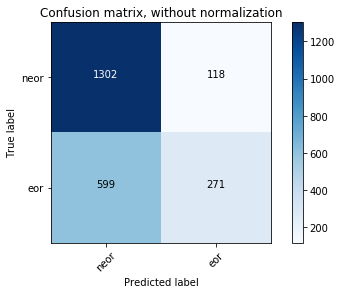

In [195]:
plt.figure()
plot_confusion_matrix(ret, classes=['neor','eor'],
                      title='Confusion matrix, without normalization')

In [24]:
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input, Merge, Concatenate, concatenate
from keras_vggface.vggface import VGGFace

#custom parameters
hidden_dim = 512
img_width = img_height = 128

vgg_model = VGGFace(include_top=False, input_shape=(img_width, img_height, 3))
last_layer = vgg_model.get_layer('pool5').output
A = Flatten(name='flatten1')(last_layer)

vgg_model2 = VGGFace(include_top=False, input_shape=(img_width, img_height, 3))

for i, layer in enumerate(vgg_model2.layers):
#    print(i, layer.name)
    layer.name=layer.name +"_2"
    
#for i, layer in enumerate(vgg_model2.layers):
#    print(i, layer.name)
    
last_layer2 = vgg_model2.get_layer('pool5_2').output
B = Flatten(name='flatten2')(last_layer2)


merged = concatenate([A,B], axis=1)

x = Dense(hidden_dim, activation='relu', name='fc6')(merged)
x = Dropout(0.5)(x)
x = Dense(hidden_dim, activation='relu', name='fc7', bias_regularizer=keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
out = Dense(n_classes, activation='softmax', name='fc8')(x)
custom_vgg_model = Model([vgg_model.input,vgg_model2.input], out)

In [25]:
#custom_vgg_model.summary()
custom_vgg_model.compile(loss='categorical_crossentropy',#'binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
#PATH_IMAGES = "C:\\Users\\rafae\\Desktop\\Coleta\\data"

#IR_FOLDER = "ir-subset-eor"
#DEPTH_FOLDER ="depth-subset-eor"

#TRAIN = 'train'
#VAL = 'val'
nb_train_samples = 7592
nb_validation_samples = 1728
epochs = 2
batch_size = 4
samples_per_epoch= 5000

In [11]:
input_imgen = ImageDataGenerator(#featurewise_center=True,
                     #featurewise_std_normalization=True,
                     rescale=1. / 255,
                    shear_range=0.1,
                    zoom_range=0.1,
                    #horizontal_flip=True
                    width_shift_range=0.1,
                    height_shift_range=0.1)

test_imgen = ImageDataGenerator(rescale = 1./255)



def generate_generator_multiple(generator,dir1, dir2, batch_size, img_height,img_width):
    genX1 = generator.flow_from_directory(dir1,
                                          target_size = (img_height,img_width),
                                          class_mode = 'categorical',
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)
    
    genX2 = generator.flow_from_directory(dir2,
                                          target_size = (img_height,img_width),
                                          class_mode = 'categorical',
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            print(X1i[0].shape, X2i[0].shape)
            yield [X1i[0], X2i[0]], X2i[1]  #Yield both images and their mutual label
            
            
inputgenerator=generate_generator_multiple(generator=input_imgen,
                                           dir1=(PATH_IMAGES + DASH + IR_FOLDER + DASH + TRAIN),
                                           dir2=(PATH_IMAGES + DASH + DEPTH_FOLDER + DASH + TRAIN),
                                           batch_size=batch_size,
                                           img_height=img_height,
                                           img_width=img_height)       
     
testgenerator=generate_generator_multiple(generator=test_imgen,
                                          dir1=(PATH_IMAGES + DASH + IR_FOLDER + DASH + VAL),
                                          dir2=(PATH_IMAGES + DASH + DEPTH_FOLDER + DASH + VAL),
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_height) 

In [29]:
hist = custom_vgg_model.fit_generator(
    inputgenerator,
    #samples_per_epoch=nb_train_samples,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=testgenerator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks = [checkpoint, history,early_stopping ])

Epoch 1/2
Found 8986 images belonging to 2 classes.
Found 15184 images belonging to 2 classes.
Found 8608 images belonging to 2 classes.
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
Found 35144 images belonging to 2 classes.
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
 130/1898 [=>............................] - ETA: 37:54 - loss: 0.3081 - acc: 0.9865(4, 128, 128, 3) (4, 1

 268/1898 [===>..........................] - ETA: 34:11 - loss: 0.1511 - acc: 0.9935(4, 128, 128, 3) (4, 128, 128, 3)


 406/1898 [=====>........................] - ETA: 31:03 - loss: 0.1001 - acc: 0.9957(4, 128, 128, 3) (4, 128, 128, 3)


 544/1898 [=======>......................] - ETA: 28:04 - loss: 0.0748 - acc: 0.9968(4, 128, 128, 3) (4, 128, 128, 3)


 682/1898 [=========>....................] - ETA: 25:08 - loss: 0.0597 - acc: 0.9974(4, 128, 128, 3) (4, 128, 128, 3)


 820/1898 [===========>..................] - ETA: 22:15 - loss: 0.0497 - acc: 0.9979(4, 128, 128, 3) (4, 128, 128, 3)


 958/1898 [==============>...............] - ETA: 19:22 - loss: 0.0426 - acc: 0.9982(4, 128, 128, 3) (4, 128, 128, 3)


1096/1898 [================>.............] - ETA: 16:31 - loss: 0.0373 - acc: 0.9984(4, 128, 128, 3) (4, 128, 128, 3)


1234/1898 [==================>...........] - ETA: 13:40 - loss: 0.0331 - acc: 0.9986(4, 128, 128, 3) (4, 128, 128, 3)


1372/1898 [====================>.........] - ETA: 10:49 - loss: 0.0298 - acc: 0.9987(4, 128, 128, 3) (4, 128, 128, 3)


1511/1898 [======================>.......] - ETA: 7:57 - loss: 0.0270 - acc: 0.9988(4, 128, 128, 3) (4, 128, 128, 3)


1651/1898 [=========================>....] - ETA: 5:04 - loss: 0.0248 - acc: 0.9989(4, 128, 128, 3) (4, 128, 128, 3)


1791/1898 [===========================>..] - ETA: 2:11 - loss: 0.0228 - acc: 0.9990(4, 128, 128, 3) (4, 128, 128, 3)


1897/1898 [============================>.] - ETA: 1s - loss: 0.0216 - acc: 0.9991(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(

(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 

 182/1898 [=>............................] - ETA: 35:04 - loss: 0.7014 - acc: 0.7005(4, 128, 128, 3) (4, 128, 128, 3)


 320/1898 [====>.........................] - ETA: 32:15 - loss: 0.4003 - acc: 0.8297(4, 128, 128, 3) (4, 128, 128, 3)


 458/1898 [======>.......................] - ETA: 29:26 - loss: 0.2799 - acc: 0.8810(4, 128, 128, 3) (4, 128, 128, 3)


 596/1898 [========>.....................] - ETA: 26:36 - loss: 0.2154 - acc: 0.9086(4, 128, 128, 3) (4, 128, 128, 3)


 734/1898 [==========>...................] - ETA: 23:47 - loss: 0.1749 - acc: 0.9257(4, 128, 128, 3) (4, 128, 128, 3)


 872/1898 [============>.................] - ETA: 20:57 - loss: 0.1473 - acc: 0.9375(4, 128, 128, 3) (4, 128, 128, 3)


1010/1898 [==============>...............] - ETA: 18:08 - loss: 0.1272 - acc: 0.9460(4, 128, 128, 3) (4, 128, 128, 3)


1148/1898 [=================>............] - ETA: 15:19 - loss: 0.1119 - acc: 0.9525(4, 128, 128, 3) (4, 128, 128, 3)


1286/1898 [===================>..........] - ETA: 12:30 - loss: 0.0999 - acc: 0.9576(4, 128, 128, 3) (4, 128, 128, 3)


1424/1898 [=====================>........] - ETA: 9:40 - loss: 0.0903 - acc: 0.9617(4, 128, 128, 3) (4, 128, 128, 3)


1564/1898 [=======================>......] - ETA: 6:49 - loss: 0.0822 - acc: 0.9652(4, 128, 128, 3) (4, 128, 128, 3)


1704/1898 [=========================>....] - ETA: 3:57 - loss: 0.0754 - acc: 0.9680(4, 128, 128, 3) (4, 128, 128, 3)


1844/1898 [============================>.] - ETA: 1:06 - loss: 0.0697 - acc: 0.9704(4, 128, 128, 3) (4, 128, 128, 3)


1897/1898 [============================>.] - ETA: 1s - loss: 0.0678 - acc: 0.9713(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(

(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 

In [30]:
custom_vgg_model.save("deep_transfer_eor_class_vggface_custom.h5")

In [19]:
from keras.preprocessing import image

#img_path = 'E:\\MestradoData\\preprocessed\\all\\01\\44_1_rgb_191.png'
#img_path = 'E:\\MestradoData\\preprocessed\\all\\06\\44_6_rgb_191.png'
#img_path = 'E:\\MestradoData\\preprocessed\\all\\10\\41_10_rgb_191.png'

#img_path = 'E:\\MestradoData\\preprocessed\\all\\01\\42_1_rgb_191.png'
#img_path = 'E:\\MestradoData\\preprocessed\\all\\06\\42_6_rgb_291.png'3
img_path = 'C:\\Users\\rafae\\Desktop\\Coleta\\data\\ir2\\validation\\16\\40_16_ir2_241.png'
img_path2 = 'C:\\Users\\rafae\\Desktop\\Coleta\\data\\depth\\validation\\16\\40_16_depth_241.png'

img_path = 'C:\\Users\\rafae\\Desktop\\Coleta\\data\\ir2\\validation\\14\\27_14_ir2_21.png'
img_path2 = 'C:\\Users\\rafae\\Desktop\\Coleta\\data\\depth\\validation\\14\\27_14_depth_21.png'

In [53]:
import datetime
a = datetime.datetime.now()

# ir image
img = image.load_img(img_path, target_size=(img_width, img_height))
ir = image.img_to_array(img)
ir = np.expand_dims(ir, axis=0)
ir = preprocess_input(ir)

# depth image
img = image.load_img(img_path2, target_size=(img_width, img_height))
dep = image.img_to_array(img)
dep = np.expand_dims(dep, axis=0)
dep = preprocess_input(dep)

c = datetime.datetime.now()

res = custom_vgg_model.predict([ir, dep])

res2 = custom_vgg_model.predict_generator(testgenerator, steps = 20)

print(ir.shape, dep.shape, res, res2.shape)
print(res2)

b = datetime.datetime.now()
print(b-a, b-c, res)

(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 3) (4, 128, 128, 3)
(4, 128, 128, 

In [55]:
testgenerator.genX1.class_indices

AttributeError: 'generator' object has no attribute 'genX1'

In [13]:
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input, Merge, Concatenate, concatenate
from keras_vggface.vggface import VGGFace

#custom parameters
hidden_dim = 512
img_width = img_height = 197

vgg_model = VGGFace(model='resnet50', include_top=False, input_shape=(img_width, img_height, 3))
    
last_layer = vgg_model.get_layer('avg_pool').output
A = Flatten(name='flatten1')(last_layer)

vgg_model2 = VGGFace(model='resnet50', include_top=False, input_shape=(img_width, img_height, 3))

for i, layer in enumerate(vgg_model2.layers):
#    print(i, layer.name)
    layer.name=layer.name +"_2"
    
#for i, layer in enumerate(vgg_model2.layers):
#    print(i, layer.name)
    
last_layer2 = vgg_model2.get_layer('avg_pool_2').output
B = Flatten(name='flatten2')(last_layer2)


merged = concatenate([A,B], axis=1)

x = Dense(hidden_dim, activation='relu', name='fc6')(merged)
x = Dropout(0.5)(x)
x = Dense(hidden_dim, activation='relu', name='fc7', bias_regularizer=keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
out = Dense(n_classes, activation='softmax', name='fc8')(x)
custom_vgg_model_res = Model([vgg_model.input,vgg_model2.input], out)

In [15]:
#custom_vgg_model.summary()
custom_vgg_model_res.compile(loss='categorical_crossentropy',#'binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [17]:
hist = custom_vgg_model_res.fit_generator(
    inputgenerator,
    #samples_per_epoch=nb_train_samples,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=testgenerator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks = [checkpoint, history,early_stopping ])

Epoch 1/2
Found 8986 images belonging to 2 classes.
Found 15184 images belonging to 2 classes.
Found 8608 images belonging to 2 classes.
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
Found 35144 images belonging to 2 classes.
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
  60/1898 [..............................] - ETA: 1:03:40 - loss: 0.1626 - acc: 0.9500(4, 197, 197, 3) (4,

 129/1898 [=>............................] - ETA: 54:42 - loss: 0.0762 - acc: 0.9767(4, 197, 197, 3) (4, 197, 197, 3)


 198/1898 [==>...........................] - ETA: 50:41 - loss: 0.0510 - acc: 0.9836(4, 197, 197, 3) (4, 197, 197, 3)


 267/1898 [===>..........................] - ETA: 47:45 - loss: 0.0380 - acc: 0.9878(4, 197, 197, 3) (4, 197, 197, 3)


 336/1898 [====>.........................] - ETA: 45:15 - loss: 0.0307 - acc: 0.9903(4, 197, 197, 3) (4, 197, 197, 3)


 405/1898 [=====>........................] - ETA: 42:56 - loss: 0.0256 - acc: 0.9920(4, 197, 197, 3) (4, 197, 197, 3)


 474/1898 [======>.......................] - ETA: 40:45 - loss: 0.0220 - acc: 0.9931(4, 197, 197, 3) (4, 197, 197, 3)


 543/1898 [=======>......................] - ETA: 38:37 - loss: 0.0193 - acc: 0.9940(4, 197, 197, 3) (4, 197, 197, 3)


 612/1898 [========>.....................] - ETA: 36:32 - loss: 0.0172 - acc: 0.9947(4, 197, 197, 3) (4, 197, 197, 3)


 681/1898 [=========>....................] - ETA: 34:28 - loss: 0.0155 - acc: 0.9952(4, 197, 197, 3) (4, 197, 197, 3)


 750/1898 [==========>...................] - ETA: 32:26 - loss: 0.0144 - acc: 0.9953(4, 197, 197, 3) (4, 197, 197, 3)


 819/1898 [===========>..................] - ETA: 30:26 - loss: 0.0132 - acc: 0.9957(4, 197, 197, 3) (4, 197, 197, 3)


 888/1898 [=============>................] - ETA: 28:26 - loss: 0.0122 - acc: 0.9961(4, 197, 197, 3) (4, 197, 197, 3)


 957/1898 [==============>...............] - ETA: 26:28 - loss: 0.0113 - acc: 0.9963(4, 197, 197, 3) (4, 197, 197, 3)


1026/1898 [===============>..............] - ETA: 24:29 - loss: 0.0106 - acc: 0.9966(4, 197, 197, 3) (4, 197, 197, 3)


1095/1898 [================>.............] - ETA: 22:32 - loss: 0.0099 - acc: 0.9968(4, 197, 197, 3) (4, 197, 197, 3)


1164/1898 [=================>............] - ETA: 20:35 - loss: 0.0094 - acc: 0.9970(4, 197, 197, 3) (4, 197, 197, 3)


1233/1898 [==================>...........] - ETA: 18:38 - loss: 0.0089 - acc: 0.9972(4, 197, 197, 3) (4, 197, 197, 3)


1302/1898 [===================>..........] - ETA: 16:41 - loss: 0.0084 - acc: 0.9973(4, 197, 197, 3) (4, 197, 197, 3)


1371/1898 [====================>.........] - ETA: 14:45 - loss: 0.0080 - acc: 0.9974(4, 197, 197, 3) (4, 197, 197, 3)


1440/1898 [=====================>........] - ETA: 12:49 - loss: 0.0076 - acc: 0.9976(4, 197, 197, 3) (4, 197, 197, 3)


1509/1898 [======================>.......] - ETA: 10:52 - loss: 0.0073 - acc: 0.9977(4, 197, 197, 3) (4, 197, 197, 3)


1578/1898 [=======================>......] - ETA: 8:56 - loss: 0.0070 - acc: 0.9978(4, 197, 197, 3) (4, 197, 197, 3)


1648/1898 [=========================>....] - ETA: 6:59 - loss: 0.0067 - acc: 0.9979(4, 197, 197, 3) (4, 197, 197, 3)


1718/1898 [==========================>...] - ETA: 5:01 - loss: 0.0064 - acc: 0.9980(4, 197, 197, 3) (4, 197, 197, 3)


1788/1898 [===========================>..] - ETA: 3:04 - loss: 0.0062 - acc: 0.9980(4, 197, 197, 3) (4, 197, 197, 3)


1858/1898 [============================>.] - ETA: 1:06 - loss: 0.0060 - acc: 0.9981(4, 197, 197, 3) (4, 197, 197, 3)


1897/1898 [============================>.] - ETA: 1s - loss: 0.0059 - acc: 0.9982(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(

(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 

(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 

 111/1898 [>.............................] - ETA: 49:20 - loss: 0.9741 - acc: 0.8874(4, 197, 197, 3) (4, 197, 197, 3)


 180/1898 [=>............................] - ETA: 47:25 - loss: 0.6012 - acc: 0.9306(4, 197, 197, 3) (4, 197, 197, 3)


 249/1898 [==>...........................] - ETA: 45:30 - loss: 0.4349 - acc: 0.9498(4, 197, 197, 3) (4, 197, 197, 3)


 318/1898 [====>.........................] - ETA: 43:36 - loss: 0.3406 - acc: 0.9607(4, 197, 197, 3) (4, 197, 197, 3)


 387/1898 [=====>........................] - ETA: 41:42 - loss: 0.2800 - acc: 0.9677(4, 197, 197, 3) (4, 197, 197, 3)


 456/1898 [======>.......................] - ETA: 39:47 - loss: 0.2378 - acc: 0.9726(4, 197, 197, 3) (4, 197, 197, 3)


 525/1898 [=======>......................] - ETA: 37:53 - loss: 0.2067 - acc: 0.9762(4, 197, 197, 3) (4, 197, 197, 3)


 594/1898 [========>.....................] - ETA: 35:58 - loss: 0.1827 - acc: 0.9790(4, 197, 197, 3) (4, 197, 197, 3)


 663/1898 [=========>....................] - ETA: 34:04 - loss: 0.1638 - acc: 0.9811(4, 197, 197, 3) (4, 197, 197, 3)


 732/1898 [==========>...................] - ETA: 32:09 - loss: 0.1485 - acc: 0.9829(4, 197, 197, 3) (4, 197, 197, 3)


 801/1898 [===========>..................] - ETA: 30:15 - loss: 0.1357 - acc: 0.9844(4, 197, 197, 3) (4, 197, 197, 3)


 870/1898 [============>.................] - ETA: 28:21 - loss: 0.1250 - acc: 0.9856(4, 197, 197, 3) (4, 197, 197, 3)


 939/1898 [=============>................] - ETA: 26:27 - loss: 0.1158 - acc: 0.9867(4, 197, 197, 3) (4, 197, 197, 3)


1008/1898 [==============>...............] - ETA: 24:33 - loss: 0.1080 - acc: 0.9876(4, 197, 197, 3) (4, 197, 197, 3)


1077/1898 [================>.............] - ETA: 22:38 - loss: 0.1011 - acc: 0.9884(4, 197, 197, 3) (4, 197, 197, 3)


1146/1898 [=================>............] - ETA: 20:44 - loss: 0.0950 - acc: 0.9891(4, 197, 197, 3) (4, 197, 197, 3)


1215/1898 [==================>...........] - ETA: 18:50 - loss: 0.0896 - acc: 0.9897(4, 197, 197, 3) (4, 197, 197, 3)


1284/1898 [===================>..........] - ETA: 16:56 - loss: 0.0848 - acc: 0.9903(4, 197, 197, 3) (4, 197, 197, 3)


1353/1898 [====================>.........] - ETA: 15:02 - loss: 0.0805 - acc: 0.9908(4, 197, 197, 3) (4, 197, 197, 3)


1422/1898 [=====================>........] - ETA: 13:08 - loss: 0.0766 - acc: 0.9912(4, 197, 197, 3) (4, 197, 197, 3)


1491/1898 [======================>.......] - ETA: 11:13 - loss: 0.0731 - acc: 0.9916(4, 197, 197, 3) (4, 197, 197, 3)


1560/1898 [=======================>......] - ETA: 9:19 - loss: 0.0699 - acc: 0.9920(4, 197, 197, 3) (4, 197, 197, 3)


1630/1898 [========================>.....] - ETA: 7:23 - loss: 0.0669 - acc: 0.9923(4, 197, 197, 3) (4, 197, 197, 3)


1700/1898 [=========================>....] - ETA: 5:27 - loss: 0.0642 - acc: 0.9926(4, 197, 197, 3) (4, 197, 197, 3)


1770/1898 [==========================>...] - ETA: 3:31 - loss: 0.0616 - acc: 0.9929(4, 197, 197, 3) (4, 197, 197, 3)


1840/1898 [============================>.] - ETA: 1:36 - loss: 0.0593 - acc: 0.9932(4, 197, 197, 3) (4, 197, 197, 3)


1897/1898 [============================>.] - ETA: 1s - loss: 0.0575 - acc: 0.9934(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(

(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 

(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 

In [21]:
import datetime
a = datetime.datetime.now()

# ir image
img = image.load_img(img_path, target_size=(img_width, img_height))
ir = image.img_to_array(img)
ir = np.expand_dims(ir, axis=0)
ir = preprocess_input(ir)

# depth image
img = image.load_img(img_path2, target_size=(img_width, img_height))
dep = image.img_to_array(img)
dep = np.expand_dims(dep, axis=0)
dep = preprocess_input(dep)

c = datetime.datetime.now()

res = custom_vgg_model_res.predict([ir, dep])

res2 = custom_vgg_model_res.predict_generator(testgenerator, steps = 20)

print(ir.shape, dep.shape, res, res2.shape)
print(res2)

b = datetime.datetime.now()
print(b-a, b-c, res)

(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 3) (4, 197, 197, 3)
(4, 197, 197, 